<a href="https://colab.research.google.com/github/leopitsillides2000/code-breaking/blob/main/code_breaking_metropolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code Breaking with Statistical Physics (Group 15)

#Table of Contents:

1. [Introduction](#Introduction)
  1. [Importing Modules](#Modules)
  2. [Global Variables](#Global)
2. [Core questions](#Core)
  1. [Question 1](#Q1)
  2. [Question 2](#Q2)
  3. [Question 3](#Q3)
  4. [Question 4](#Q4)
  5. [Question 5](#Q5)
  6. [Question 6](#Q6)
3. [Improvements](#Improvements)
  1. [Precalculation](#Precalculation)
  2. [Metropolis algorithm](#Metropolis-1)
  3. [Metropolis 2 alogrithm](#Metropolis-2)
4. [T-value optimisation](#T-optimisation)
5. [Statistics](#Extensions)
6. [Decoding messages](#Decoding)
7. [Conclusion](#Conclusion)
8. [Bibliography](#Bibliography)

<a id=Introduction></a>
# Introduction



In this project, we want to explore a number of different aspects of code breaking. First of all, we will look at a number of basic methods of solving codes, including ciphers which are cyclic permutations of the characters, and using the frequency of characters from a sample text to determine how frequently we expect characters to come up within the codes. 

We will then explore one particular algorithm for code breaking, which is known as the Metropolis algorithm. A score is assigned to the code how plausible it is as a piece of English text, and then the roles of two characters are swapped and the score computed again. If the score of the changed cipher is better, then we replace it, and if not then we have a certain probability of replacing it anyway. 

Following this, we will explore the Metropolis algorithm further, making improvements and changes to our algorithm so that we can solve more difficult and different codes. This includes codes in different languages, and codes which are shorter in length. We will do this by adapting our Metropolis algorithm to look at differernt size n-grams to see which kind are best for different lengths of codes, and by exploring the best way of dealing with T, a very important factor in determining the probability that a worse score is accepted anyway. Finally, we will try and use our improved algorithms to break a number of codes.

##Importing Modules<a id=Modules></a>

To begin our code, we have to import several modules for use through the project:

1.   The library `requests` has been used to get a text from a website, and include it within a string which we can easily manipulate. For our project, it has been used to obtain the text from Moby Dick (and as an extension, Jane Eyre in French) and add it to a string so that it can be manipulated and analysed.
2. We have used `re` to be able to manipulate strings, and more specifically to replace certain characters within them. We have used it to remove all punctuation from the Moby Dick text, so it is in a format we can more easily deal with when calculating the probabilities of bigrams. Additionally, we have used the `findall` function to help us find all of the occurrences of a certain pattern of characters within a passage of text.  
3.   `numpy` has lots of handy tools for mathematical coding. More specifically, we have used the logarithm and exponential functions within our metropolis algorithm. Also, `numpy` has a random implementation that we used instead of importing `random`. Further in <a href=#statistics>statistics</a> section we use variance and mean of `numpy`.
4.   `matplotlib` is required for the graphing that we will be doing within <a href=#statistics>statistics</a>.
5. `time` is required for timing how long some of the algorithms run for.

In [ ]:
import numpy as np, re, requests, time, matplotlib.pyplot as plt

##Global Variables <a id='Global' ></a>

Below we have defined a few global variables which we will use throughout the whole project. `codedMsg` is a list including all of the codes that we wish to decode, which makes life more simple when putting the codes through the algorithms below as we can simply use `codedMsg[i]` for the $(\texttt{i+1})^{\texttt{th}}$ coded messages. 

Additionally, `symbols` is a string with all capital letters of the alphabet and space, which has been used throughout the project to create dictionaries for counting the frequency of letters occurring.

In [ ]:
codedMsg = ['GPKZFER JRSER EKWIGIWKWVRZ YZRCWMWCRSEVRYWEWISCRGLIGFJWRGIFYISDD EYRCSEYLSYWRGPKZFEJRVWJ YERGZ CFJFGZPRWDGZSJ QWJRUFVWRIWSVST C KPRN KZR KJREFKSTCWRLJWRFXRJ YE X USEKR EVWEKSK FER KJRCSEYLSYWRUFEJKILUKJRSEVRFTAWUKRFI WEKWVRSGGIFSUZRS DRKFRZWCGRGIFYISDDWIJRNI KWRUCWSIRCFY USCRUFVWRXFIRJDSCCRSEVRCSIYWRJUSCWRGIFAWUKJ', 'RECFV KUWE VJCRWQFCRCFICYWEZRWKLVJWQF SCRRZ ALVWJLAACFWNATZVW NFWIZRZT FWELYWVCSTWNRWLVTE NBEWZTWHLRWCLRMWS FWJCWHE WUACHWEZJWR WHCVVWT WRCCWTELTWECWHLRWQF S NAYVMWCPKZTCYWTECWJ JCATWTELTWEZVT AWKNGZTTWRWGF LYWGLKUWELYWYZRLQQCLFCYWTEF NBEWTECWY FWJMWK JFLYCWFNRECYWT WTECWTLGVCWVLZYW NTWLVVWTECWRVZQRW SWQLQCFWK ATLZAZABWYLAKZABWJCAWZAWSF ATW SWEZJWLAYWTEFCHWEZJRCVSWZAT WLAWZATFZKLTCWLAYWCVLG FLTCWKLVKNVLTZ AWS FWTH WE NFRWZWHLTKECYWEZJWLRWECWK ICFCYWRECCTWLSTCFWRECCTW SWQLQCFWHZTEWSZBNFCRWLAYWVCTTCFRWR WK JQVCTCVMWLGR FGCYWZAWEZRWTLRUWTELTWECWELYWCIZYCATVMWS FB TTCAWJMWQFCRCAKCWR JCTZJCRWECWHLRWJLUZABWQF BFCRRWLAYWHEZRTVCYWLAYWRLABWLTWEZRWH FUWR JCTZJCRWECWHLRWQNDDVCYWLAYWH NVYWRZTWS FWV ABWRQCVVRWHZTEWLWSNFF HCYWGF HWLAYWLWILKLATWCMCWSZALVVMWECWRQFLABWSF JWEZRWKELZFWHZTEWLWKFMW SWRLTZRSLKTZ AWLAYWHLVUCYWNQWLAYWY HAWTECWF JWFNGGZABWEZRWELAYRWT BCTECFWTECAWECWHF TCWLWV ABWTCVCBFLJWNQ AWLWKLGVCWS FJWZSWJMWLARHCFWT WTEZRWZRWLRWZWE QCWM NWHZVVWELICWLWICFMWQFCTTMWKLRCWT WLYYWT WM NFWK VVCKTZ AWHLTR AWRLZYWECWZWCPQCKTWTELTWHCWRELVVWGCWLGVCWT WB WY HAWT WA FS VUWT J FF HWLAYWT WTLUCW NFWSFZCAYWR JCWICFMWYCSZAZTCWACHRWLRWT WTECWRCKFCTW SWEZRWLAA MLAKCWZWK ASCRRWTELTWZWHLRWSZVVCYWHZTEWKNFZ RZTMWGNTWZWHLRWLHLFCWTELTWE VJCRWVZUCYWT WJLUCWEZRWYZRKV RNFCRWLTWEZRW HAWTZJCWLAYWZAWEZRW HAWHLMWR WZWHLZTCYWNATZVWZTWRE NVYWRNZTWEZJWT WTLUCWJCWZAT WEZRWK ASZYCAKCWGNTWTECFCWHLRWLWYCVLMWZAWTELTWLARHCFZABWTCVCBFLJWLAYWTH WYLMRW SWZJQLTZCAKCWS VV HCYWYNFZABWHEZKEWE VJCRWQFZKUCYWNQWEZRWCLFRWLTWCICFMWFZABW SWTECWGCVVW AWTECWCICAZABW SWTECWRCK AYWTECFCWKLJCWLWVCTTCFWSF JWEZVT AWKNGZTTWLVVWHLRWXNZCTWHZTEWEZJWRLICWTELTWLWV ABWZARKFZQTZ AWELYWLQQCLFCYWTELTWJ FAZABWNQ AWTECWQCYCRTLVW SWTECWRNAYZLVWECWZAKV RCYWLWK QMW SWZTWHEZKEWZRWECFCWFCQF YNKCYWCVRZCWQFCQLFCWT WJCCTWTEMWB YWE VJCRWGCATW ICFWTEZRWBF TCRXNCWSFZCDCWS FWR JCWJZANTCRWLAYWTECAWRNYYCAVMWRQFLABWT WEZRWSCCTWHZTEWLAWCPKVLJLTZ AW SWRNFQFZRCWLAYWYZRJLMWEZRWSLKCWHLRWELBBLFYWHZTEWLAPZCTM', 'TULOMREMAEKBLRSWCTMWBIHB BTN KKUT NBTULOMRB DWBKSYMBYSWMRDBTULOMRKBJUNNBRMQM NBKE EUKEUT NBUDPSRY EUSDB ISCEBEOMBLN UDEMAEB DWBEO EBUDPSRY EUSDBT DBSPEMDBIMBCKMWBESBIRM XBEOMBTULOMRB PEMRBEOMBWUKTSQMRHBSPBPRMVCMDTHB D NHKUKBIHBEOMB R IBY EOMY EUTU DB DWBLSNHY EOB NBXUDWUB NKSBXDSJDB KB NXUDWCKBUDBEOMBDUDEOBTMDECRHBDM RNHB NNBKCTOBTULOMRKBTSCNWBIMBIRSXMDBIHB DBUDPSRYMWB EE TXMRBKCTOBTN KKUT NBTULOMRKBKEUNNBMDGSHBLSLCN RUEHBESW HBEOSCFOBYSKENHB KBLCZZNMKB NBXUDWUBJRSEMB BISSXBSDBTRHLESFR LOHBMDEUENMWBRUK N OBPUBUKEUXOR GB NBYC YY BY DCKTRULEBPSRBEOMBWMTULOMRUDFBTRHLESFR LOUTBYMKK FMKBJOUTOBWMKTRUIMWBEOMBPURKEBXDSJDBCKMBSPBPRMVCMDTHB D NHKUKB DWBTRHLE D NHKUKBEMTODUVCMKB DBUYLSRE DEBTSDERUICEUSDBSPBUIDB WN DBJ KBSDBK YLNMBKUZMBPSRBCKMBSPBPRMVCMDTHB D NHKUK', 'RJLHXTNERXWZEWZSXLESNIFWX TEKJAAS NYSVEWZSECYWKZEKJTVYAW TWVERSLSELYTTXTNETYPDSLVEDJVH AXVVELJASER VED VXK AAIEWJECJEWZSEK AKYA WXJTVEWZSEVYPVEDSLCJRVHXEV XCEVJERZSTEWZSEVWSLTEK PSEULSSEJTEPJTC IEPJLTXTNERSEK AKYA WSCEWZ WERSEVZJYACEASWEWJTTSVEJUER WSLED AA VWEXTE WEWZSELS LEJUEWZSEOSVVSAEWJEFYVZEWZSEVWSLTECJRTE TCEAXUWEWZSEDJR', 'IZWLXSZF QEFLZTQUVLSZMIHZCIVLUZEDDZIUPZXLYAHLPZCQZLICZECZMIHZC QAO CZ QMLWLXZC ICZECHZIBBLCECLZTEO CZKLZHCETADICLPZKSZIZBEULIBBDL', 'RVRRKZHKTVYPJCGVCHGVGXECUKRKZGRSKZKWGVGRSPKAGVCHGVGHZVLJCAYOGRZET KRKZGSKWGTOGSKZJGAVPZOGHVCHOGRPQUYPCLGRSKGAVCQOGJAGSPWGYVHOGAZPKCHGRSKGCOT SGPCGOKYYJMGQVCGMKGWKKGRSKGTVWRKZGWRZJUKGMSVRGVGNEVKZKGAKYYJM', 'LOJ WUZCWKCTFHHFHTWUZFHQWMZEUW EAWKCWUZCWCHV', 'EYENXRPSURPGUUIRKSUGURSHYY NXRCUUIREPRCHBIRENBRMAOKUGIRKUGURS NX NXROREHABRFEAUBONRBGUKROHPRSURBGONURENBRPORSUGRJ JURKEIRI NX NXRORPKEIRJ CGOFSRIENXRIPGEPSIJUWIRENBRGUUAIRISURB GABRPSUYREMMRMHRFAUEGAWRORKSUNRPSUGURFEYRERWUAARORMOGU XNRIVHUUAIRPSEPRBENXRSUGRPEJIEAPUUG URO', 'WDYRDYLDQCSLR KTYDPYZ LXSKTYWDYQ U KTYZOITYGIDYCDYJSILPTYLDUDKOTYCIQYKQTP QPYODYPDRZTYCDQPDQCLDYODTYJL GIDRDQPTYSLH QKGIDTYCDTYMSKTDLKDTYCSIULKLYODTYADINYZSILYXKNDLYODYB ODKCSTJSZDYCDYOSMTJILKPDYCDYHSYPDLYHLYJDYIQDYOIDILYRSRDQP QYDYCDYJSQTJKDQJDYODYTSRRDKOYSIYDP KDQPYZOSQHYTYODTYRDIMODTYO YJF RMLDYODYPSIPYCSQPYWDYQDP KTYGIIQDYZDPKPDYZ LPKDYDPY YOKQTDQTKMKOKPDYCIGIDOYWDYLDPSILQ KTYUKPDYRIQKL', 'GYYUXPUXGTBQTDFU', 'ZVVFEKTFZKKO', 'RIZOGS BXTPK YWH JQNE LUC MADFV']
symbols = ' ABCDEFGHIJKLMNOPQRSTUVWXYZ'

A function used throughout the project to measure time it takes to perform a certain function:

In [ ]:
time_measurements = {}
# small function to measure time of the given algorithm
def measure_time(func):
    def wrap(*args, **kwargs):
        global time_measurements
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        time_measurements[func.__name__] = time_measurements.get(func.__name__,[]) + [end-start]  
        return result
    return wrap

The function `measure_time` allows us to store the values of how long a function takes to run, by writing @measure_time before a function. 

It works for by logging the time when the function starts, allows the function to run, and then logs the time when the function finishes. Then, it adds to the dictionary `time_measurements`, with the key being the name of the function, and the value being the time taken between the function starting and ending. This allows us to easily recall how long it took to run.

We need the below code to set the state for the seed generation random variable.

In [ ]:
state = (3, (2147483648, 3567812383, 1729019890, 1637816241, 3488138722, 1974281159, 3741403301, 4149085213, 294967390, 2361562605, 1650483437, 2452221510, 1980224725, 3260997856, 4271412942, 198555492, 343216728, 132021603, 2614205138, 3921762468, 1909443860, 4089932979, 2673236719, 1208100211, 984708807, 283495841, 610937309, 779393271, 4199214196, 3928778887, 3542724121, 4027525058, 173209204, 255647760, 418962483, 2025816433, 4089435999, 2128475727, 3902810581, 1392149412, 548729732, 3709927389, 4124478751, 1133657504, 2585279577, 1819006752, 2877910389, 2588834254, 2541894808, 2707568619, 1799273057, 2566891215, 514448765, 1031377537, 2420068780, 2007301693, 161607361, 1403360292, 3002005472, 2794177368, 3907252034, 1479588329, 239476916, 1089375882, 1432473085, 4282216039, 733084307, 3033442014, 1397194019, 1961233622, 1185090217, 2304949738, 3973733249, 3456873610, 219857351, 3584980609, 1891580365, 3716322994, 3941507295, 1411319613, 2084992224, 11512551, 2954972273, 1135907946, 4255730918, 3959690998, 306774861, 2063102980, 4097666539, 1963211288, 991896060, 280215645, 4265782956, 1041858543, 4111943829, 1452200685, 1953342318, 4202348104, 155518846, 476286099, 3941426781, 3105287091, 1035046978, 1659200225, 891304848, 1512600591, 4141118664, 3537656378, 2917852866, 4166927319, 1257924597, 3048936810, 2084832396, 2008810790, 133610127, 2483397198, 2868715245, 1764730631, 2237472982, 1255507260, 3985997735, 31261045, 1828313212, 3597603707, 103865701, 2115662327, 2086060351, 642939403, 3953760574, 3631977623, 2189882864, 2046945024, 703680121, 2527784161, 2203261581, 122785280, 356863414, 496932578, 3342892767, 1698297190, 2854402070, 2788114353, 98913659, 1461619361, 1004874058, 4118950608, 2469825370, 376216695, 1576165726, 2295973314, 2749320588, 3894706558, 31406543, 3402854158, 4289824030, 1084289086, 1478448435, 1926838017, 4000544180, 175243469, 554663630, 418620499, 597249098, 2666754270, 1868834522, 556700173, 839921833, 1989607497, 2185426898, 406774517, 4125363974, 1989995764, 296189898, 3766227941, 2364897472, 188983648, 214567342, 3964357897, 632727233, 231473673, 1990072647, 3685151343, 4065614038, 2110335025, 3564688072, 1252513615, 788760511, 2575503035, 1541549930, 777834539, 3944762241, 3301639555, 1862805153, 785565040, 1067976560, 717117723, 1062940740, 1861592534, 2918236758, 1099872244, 189397952, 1934041990, 2139753336, 1638445649, 4117950556, 965020468, 2688244340, 191495137, 1516446898, 1485477945, 3961503514, 2673868006, 2857812875, 806549110, 4090946742, 3048608143, 3876323601, 1815415320, 285478053, 3197786703, 4053543255, 773970270, 810955838, 2808684345, 937401355, 2385556947, 3181858088, 2715719509, 857310649, 3285911932, 1705924031, 2088231470, 44218786, 3582066072, 3567250908, 109396011, 2364060384, 3735139866, 3406594206, 4165184824, 162320350, 2101680729, 3139399131, 2298873529, 2754892182, 1090962771, 3570152981, 3481361820, 1827548915, 256828245, 2962125332, 3925775671, 2848750480, 2416186382, 3888043955, 2477638490, 1490560102, 2774051307, 2533968764, 2174574487, 1186836711, 2595491831, 803763674, 45554390, 3221752597, 3275618367, 2487266615, 1577687516, 3399834001, 3774442298, 1863790674, 2338243381, 4183551577, 1323469664, 510876966, 2634313465, 1437457625, 852345176, 3027055482, 364523909, 3458534286, 2416225412, 3257194138, 1681228766, 1928296747, 512053537, 2761019719, 261834040, 3030006706, 2418893514, 35228292, 3025399645, 3552022748, 2358683628, 2434978697, 3474196267, 167689724, 3574373661, 426108906, 3930194703, 785321379, 651460034, 2597328764, 2073452760, 3237274614, 474662499, 3976316992, 3083345987, 1278324188, 4174137419, 667088420, 713845537, 2562587143, 2508992169, 3585686471, 3479380341, 690673338, 3854049392, 2971601121, 2908792781, 1835160630, 2809003722, 304986136, 3419522601, 1682013924, 3504083545, 4235227625, 3815260753, 3204188472, 2931141319, 2384221935, 3963754936, 897704642, 3433705375, 403682705, 1197681713, 4123616454, 3656677523, 3131774262, 1395618509, 4259616163, 1612228983, 3740398145, 664354813, 1791627173, 311359496, 2121390136, 960757454, 3336649264, 2301243093, 965367243, 3281591503, 543008940, 4071298881, 4191008128, 2919956385, 3560168418, 856214539, 3189357697, 3350935278, 3243177328, 3142944592, 922722370, 3758307020, 1086949302, 1633997241, 2726370084, 3318509527, 1254899540, 2885990701, 3310672668, 848773370, 385875653, 3316366072, 395153956, 4072420877, 490131823, 417871793, 1129256156, 225849599, 610704852, 1741554576, 1795466126, 4204703544, 1141478999, 4016326649, 200126897, 2655909357, 3274582250, 2667679061, 266600511, 348668254, 794978763, 2441072877, 254585835, 2546339207, 4072327658, 2564393344, 4017622814, 488679756, 1949774489, 4189487932, 834927607, 3950366968, 50743936, 3506364, 612925320, 4273476516, 1678936931, 1551521211, 1803542787, 3842791313, 871940135, 2463519244, 1067961448, 1677090083, 498955154, 4115022568, 2370813268, 4065640543, 2376302534, 1048792777, 2653712691, 1495920862, 81248887, 4095444062, 1574842129, 2988858683, 616847384, 1711231814, 1676764921, 4047221985, 2680754252, 495678094, 1684785202, 3137973494, 1112300416, 1888895048, 341956671, 1804235305, 2623562475, 772703992, 3223717770, 428983504, 2876929594, 3088672715, 1221103184, 2282713663, 2374088212, 3903454229, 1437769374, 3353081750, 1703439977, 4288173944, 3107982054, 3588590004, 3285416615, 2644829701, 2633373339, 1765151958, 1256330906, 241232287, 2431808889, 2208836436, 2410647044, 2699900054, 1017882481, 1565163482, 2905420305, 2278802864, 2960391612, 3344301315, 1456111528, 401741543, 1750604840, 2857800673, 2353190198, 3503035634, 336970563, 1305855119, 3227511607, 896728131, 867873453, 804589722, 2145369535, 1385769665, 3081170153, 514580181, 3938431476, 1634735913, 2838435334, 1523072077, 2485503061, 4124747873, 1970157412, 2310340962, 2183100354, 3562568290, 1551331808, 4079435237, 878710014, 4145953499, 3061127626, 370331553, 2800185623, 885322365, 61854110, 1451478388, 3280405765, 1179422985, 770543423, 3157086442, 142968818, 3775672372, 3510936582, 1893475389, 3178938066, 2489202076, 1090943394, 767196490, 3422253452, 1069870991, 1472177994, 2501664278, 2732470693, 2038189905, 3494797325, 2291978945, 1873994106, 3727372456, 2379539054, 3575769233, 723265349, 939057566, 2601946946, 1250313943, 509384049, 3574755140, 697222460, 503009357, 2006531359, 1837621202, 165397748, 1308644162, 3729361968, 2410734256, 871651979, 1432430139, 3253253855, 2082122613, 3523879121, 3149128765, 4020929327, 3617639040, 3113433896, 1731595380, 790190168, 462835217, 683528763, 1041651631, 3537659353, 3263126830, 3569805476, 948172708, 890807990, 883046284, 749774045, 2889741850, 1097207695, 124913855, 1775972632, 82401764, 762483024, 2797958062, 3126726807, 2417961912, 1034239934, 3634220332, 2330619127, 1622790269, 347462846, 3920586038, 3920266405, 1623446865, 1544127245, 2365208631, 2109787373, 1310864359, 2030443412, 1523209165, 1844380100, 1684057112, 3161096249, 3407868508, 1067357139, 1473802285, 7724525, 2875646065, 982497105, 388524786, 2617357658, 4011690240, 2419946763, 4020683316, 2371680884, 1883894444, 3276488893, 3399369961, 1283508143, 310765650, 3980837241, 3177178598, 5903192, 5317158, 46646420, 3241651803, 2204972039, 1302417345, 2562803383, 2947702950, 8257054, 4017594818, 4145688415, 2399869033, 624), None)

#Core question 1 to 6<a id=Core></a>

##Question 1<a id=Q1></a>


For Question 1, we simply need to write some code which performs a cyclic shift of the 27 characters. We define a function `core1` below:

In [ ]:


def core1(code, symbols, interactive=False):
    # function can have interactive input or can consider all the variations

    mapping = symbols
    i = 0

    if interactive:
        print('Press enter to accept default message or enter message with only a-z and space symbols')
        print('Press enter to terminate cipher rotation')
        inp = input('Enter coded message: ').upper()
        # replacing coded message with passed if input is empty
        code = code if inp == '' else inp

    while True:
        if interactive:
            inp = input('Enter shift: ')  # number to shift by
            # if nothing is passed stop
            if inp == '': break
            # if not number repeat request
            if int(inp) is int: continue
            # validate i and make sure 0 <= i < 27
            i = abs(int(inp)) % len(mapping)
        else:
            i += 1
            if i > len(mapping):
                break
        cipher = mapping[-i:] + mapping[0:-i]  # cyclic shift
        decoded = ''.join([mapping[cipher.index(letter)] for letter in code])
        print(i, ':', decoded[:60])


0.00018668174743652344


For this function, we begin by simply calling the mapping the original symbol list, and setting a counting variable `i` equal to zero. Then, if we want the interactive version, a question is asked first if they want to input their own code. If not, we just use the code as the variable in the question.
 
We then ask for the input of an integer to be the shift. The way we perform the cyclic shift of the cipher is by slicing the last `i` characters of the string `mapping`, adding it to a new list called `cipher`, and then adding the first characters of `mapping` that hadn't already been sliced to the list. Finally, a new string `decoded` is defined. For each letter in the code, we find the index within the cipher of each letter, then find the mapping corresponding to that index. We then join these together to become one string, `decoded`.

If the interactive option hasn't been chosen, then the above is done for all i between 0 and 26, and the output for each is printed.

We print below the shifted text for message 1:

In [ ]:
core1(codedMsg[0], symbols)

1 : HQL GFSAKSTFSAFLXJHJXLXWS AZ SDXNXDSTFWSZXFXJTDSHMJHGKXSHJGZ
2 : IRMAHGTBLTUGTBGMYKIKYMYXTAB ATEYOYETUGXT YGYKUETINKIHLYTIKH 
3 : JSNBIHUCMUVHUCHNZLJLZNZYUBCABUFZPZFUVHYUAZHZLVFUJOLJIMZUJLIA
4 : KTOCJIVDNVWIVDIO MKM O ZVCDBCVG Q GVWIZVB I MWGVKPMKJN VKMJB
5 : LUPDKJWEOWXJWEJPANLNAPA WDECDWHARAHWXJ WCAJANXHWLQNLKOAWLNKC
6 : MVQELKXFPXYKXFKQBOMOBQBAXEFDEXIBSBIXYKAXDBKBOYIXMROMLPBXMOLD
7 : NWRFMLYGQYZLYGLRCPNPCRCBYFGEFYJCTCJYZLBYECLCPZJYNSPNMQCYNPME
8 : OXSGNMZHRZ MZHMSDQOQDSDCZGHFGZKDUDKZ MCZFDMDQ KZOTQONRDZOQNF
9 : PYTHON IS AN INTERPRETED HIGH LEVEL AND GENERAL PURPOSE PROG
10 : QZUIPOAJTABOAJOUFSQSFUFEAIJHIAMFWFMABOEAHFOFSBMAQVSQPTFAQSPH
11 : R VJQPBKUBCPBKPVGTRTGVGFBJKIJBNGXGNBCPFBIGPGTCNBRWTRQUGBRTQI
12 : SAWKRQCLVCDQCLQWHUSUHWHGCKLJKCOHYHOCDQGCJHQHUDOCSXUSRVHCSURJ
13 : TBXLSRDMWDERDMRXIVTVIXIHDLMKLDPIZIPDERHDKIRIVEPDTYVTSWIDTVSK
14 : UCYMTSENXEFSENSYJWUWJYJIEMNLMEQJ JQEFSIELJSJWFQEUZWUTXJEUWTL
15 : VDZNUTFOYFGTFOTZKXVXKZKJFNOMNFRKAKRFGTJFMKTKXGRFV XVUYKFVXUM
16 : WE OVUGPZGHUGP

From inspection of all of the shifts above, it is clear to see that a shift of 9 results in the text being decoded as it is the only one which makes any sense. So for Code 1, the decoded text is:

PYTHON IS AN INTERPRETED HIGH LEVEL AND GENERAL PURPOSE PROGRAMMING LANGUAGE PYTHONS DESIGN PHILOSOPHY EMPHASIZES CODE READABILITY WITH ITS NOTABLE USE OF SIGNIFICANT INDENTATION ITS LANGUAGE CONSTRUCTS AND OBJECT ORIENTED APPROACH AIM TO HELP PROGRAMMERS WRITE CLEAR LOGICAL CODE FOR SMALL AND LARGE SCALE PROJECTS

Additionally, using this raw decoded text, we can give a best guess for a properly punctuated and cased message:

"Python is an interpreted, high level, and general purpose programming language. Python's design philosophy emphasizes code readability with its notable use of significant indentation its language constructs and object oriented approach aim to help programmers write clear, logical code for small and large scale projects." 

##Question 2 <a id=Q2></a>

For this question, we need to download a large body of English text, which can be used later for analysis regarding the frequencies of single characters, bigrams, and larger combinations of characters. In order to process the text in the way that we want to, we have written a function `processText`, which takes the url of a website with the text wanted as a parameter, manipulates the text to remove all characters in a way that makes the remaining text still make sense (despite not being gramatically correct), and then writes it to a text document so that it can be easily recalled for analysis.

In [ ]:
def processText(url):
    # getting sample text from given URL
    text = requests.get(url).text
    # Transforming text to uppercase
    text = text.upper()
    # Removing characters that are not A-Z or space
    text = re.sub(r'[^A-Z \-]', "", text)
    # Splitting up hyphenated words
    text = text.replace('-',' ')
    # Remove repeating spaces
    text = " ".join(text.split())

    with open('text.txt', 'w', errors='ignore') as file:
      # Saving the formated text to a file
      file.write(text)

In order for the text to still make sense, we have has to make some changes to the way by which we remove characters connecting words. Apostrophes can be removed and replaced with nothing, as it is easy to read some text with them removed. However, hyphens more commonly connect two different words which would very rarely be seen connected. So instead, we replace them with a space to put them as two different words. Initially, to achieve this, we used `re` to convert hyphens to spaces. This is inefficient and involved importing a separate module, so instead we have used `.replace()` which gave the same results.

The function `core2` below performs `processText` upon the website, and prints the first 80 characters of the text as well. 


In [ ]:
def core2(url, n):
    processText(url)
    # read first n characters of the formatted text
    print(open('text.txt', 'r').read()[:n])


In [ ]:
core2('http://www.gutenberg.org/files/2701/2701-0.txt', 80)

THE PROJECT GUTENBERG EBOOK OF MOBY DICK OR THE WHALE BY HERMAN MELVILLETHIS EBO


For use later in the project, we define a new string `sample_text`, which contains the processed text of Moby Dick:

In [ ]:
sample_text = open('text.txt', 'r').read()

##Question 3<a id=Q3></a>


For this section, we want to compare the frequency of individual characters in our sample text (Moby Dick) to the frequency of the characters in the coded message. The most frequent letter in the text will be mapped to the most frequent letter in the coded message, and following on with the least common letter in the sample text being mapped the letter that appears the least in the coded text.

In order to do this, we first need to define a few functions to assist us:

In [ ]:
def decode(coded, mapping):
    # decoding the message using given cipher
    decoded = ''
    for l in coded:
        # converts letter using mapping then adds it to the empty string
        decoded += mapping[l] 
    return decoded

`decode` takes a coded message, and decodes it given a dictionary with the mapping of the letters. Note that for the rest of the project, we will be making any swaps of letters to the cipher and then applying the cipher to the message each time, rather than making a swap of symbols within the function itself each time. This allows us to more easily keep track of the swaps in letters that we have made.

In [ ]:
@measure_time
def freq(text):
    # calculate frequency of letters in text
    global symbols
    # creating dictionary to count
    freq_l = dict.fromkeys(symbols, 0)

    for l in freq_l.keys():  # counting each letter
        freq_l[l] = text.count(l)

    return freq_l

`freq` returns a dictionary containing all of the 27 characters as keys, and for each of them the value is the number of times that character appears in the text that we want to analyse. For example, we if we run the function on the string `"BANANAS"` we get the following dictionary.

In [ ]:
freq("BANANAS")

{' ': 0,
 'A': 3,
 'B': 1,
 'C': 0,
 'D': 0,
 'E': 0,
 'F': 0,
 'G': 0,
 'H': 0,
 'I': 0,
 'J': 0,
 'K': 0,
 'L': 0,
 'M': 0,
 'N': 2,
 'O': 0,
 'P': 0,
 'Q': 0,
 'R': 0,
 'S': 1,
 'T': 0,
 'U': 0,
 'V': 0,
 'W': 0,
 'X': 0,
 'Y': 0,
 'Z': 0}

Finally, we define the function `match`, which uses the `freq` function within it:

In [ ]:
@measure_time
def match(code):
    # count frequencies in sample text and message
    main_f = freq(sample_text)
    coded_f = freq(code)

    # sorting both ciphers by frequency
    main_f = dict(sorted(main_f.items(), key=lambda item: item[1]))
    coded_f = dict(sorted(coded_f.items(), key=lambda item: item[1]))

    # mapping sorted lists to create cipher
    mapping = {}
    for l1, l2 in zip(coded_f, main_f):
        mapping[l1] = l2

    return mapping

`match` assigns the most frequent character in the sample text that we are using to the most frequent character in the code, the second most frequent in the sample text to the second most frequent character in the code, and contiues for all 27. It starts by using `freq` to get the dictionaries of the number of times each character comes up in the sample text and the code, then sorts the dictionaries by the frequency of the characters in each of them. The way these lines of code work is:
1. The `{key:value}` pairs within the frequency count dictionary are converted to tuples i.e. `(key, value)`. 
2. These are then sorted by the second input in the tuple (the value), in this case the frequency. 
3. Finally, we define a new dictionary, which has the keys in order of frequency characters in the code, and the values as the characters in the sample text, organised the same way. 

We return a mapping, which can then be used in conjunction with `decode` above to work out the message.

Using these 3 functions together, we define a function `core3`, which maps the $k^{th}$ most common character of the message to the $k^{th}$ most common character in English, for each $k$ between 1 and 27.

In [ ]:
def core3(code):
    # create best match cipher
    cipher = match(code)
    # display message
    print(decode(code, cipher))

For this, we simply find the mapping of the most frequent characters using `match`, and then print the message decoded with this cipher. 

We apply this function to the second message, with the result below:

In [ ]:
core3(codedMsg[1])

ISERLOCV SOLMEI FREIERKED SNI CALM FROWEIINOHAL MAHHER GHTNL OGR KNINTOR SAD LEWT GI ALTSOGPS NT UAI EAIY WOR ME USO VHEU SNM IO UELL TO IEE TSAT SE UAI FROWOGHDLY EQCNTED TSE MOMEHT TSAT SNLTOH CGBNTT I BROAD BACV SAD DNIAFFEARED TSROGPS TSE DOR MY COMRADE RGISED TO TSE TABLE LAND OGT ALL TSE ILNFI OW FAFER COHTANHNHP DAHCNHP MEH NH WROHT OW SNM AHD TSREU SNMIELW NHTO AH NHTRNCATE AHD ELABORATE CALCGLATNOH WOR TUO SOGRI N UATCSED SNM AI SE COKERED ISEET AWTER ISEET OW FAFER UNTS WNPGREI AHD LETTERI IO COMFLETELY ABIORBED NH SNI TAIV TSAT SE SAD EKNDEHTLY WORPOTTEH MY FREIEHCE IOMETNMEI SE UAI MAVNHP FROPREII AHD USNITLED AHD IAHP AT SNI UORV IOMETNMEI SE UAI FGJJLED AHD UOGLD INT WOR LOHP IFELLI UNTS A WGRROUED BROU AHD A KACAHT EYE WNHALLY SE IFRAHP WROM SNI CSANR UNTS A CRY OW IATNIWACTNOH AHD UALVED GF AHD DOUH TSE ROM RGBBNHP SNI SAHDI TOPETSER TSEH SE UROTE A LOHP TELEPRAM GFOH A CABLE WORM NW MY AHIUER TO TSNI NI AI N SOFE YOG UNLL SAKE A KERY FRETTY CAIE TO ADD TO YOGR COLLECTN

It is clear to see that this is by no means perfect, but that it does begin to form some words which are almost readable, and most definitely guessable. This approach doesn't work by itself, but it gives a good guess which can be fully decoded using human involvement.

##Question 4<a id=Q4></a>

Having made a guess using the letter frequencies, we want to be able to adjust the code ourselves by swapping the roles of two characters. In order to do this, we first define a function `swap`:

In [ ]:
def swap(mapping, letter):
    # takes cipher (mapping) as dictionary and letter as list of two characters

    # FIX as otherwise causes problems
    mapping_new = mapping.copy()

    # creating cipher inverse for easy retrieval of letter which maps
    inv_map = {v: k for k, v in mapping_new.items()}

    # B -> A, D -> C
    A, C = letter
    # finding what maps to the letters given
    B = inv_map[A]
    D = inv_map[C]
    # remapping letters
    mapping_new[D] = A
    mapping_new[B] = C

    return mapping_new

We begin by making a copy of the mapping, the reason being that when running our swap function within the Metropolis algorithm, not only the intended mapping would change but also any mapping that we had previously set equal to that mapping. This meant that our Metropolis algorithm would make swaps even when the conditions determined it not to and, consequently, wouldn’t converge. We then make a dictionary called `inv_map`, which is the opposite way to the mapping dictionary returned in `match` above: it has the character mapped to as the keys, and the original characters which have been mapped as the values. This allows us to work the other way. `mapping` tells us where each character in the original code has gone to, `inv_map` tells us where each character in the cipher has come from.

Following this, we simply look in our inverse mapping for what the letters we now want to swap were in the original coded message, and then swap their roles. 

This has then adjusted our cipher to account for our human interaction and word recognition, and so we can now combine this with the previous question to define a new function `core4`: 

In [ ]:
def core4(code):
    # create best match cipher
    cipher = match(code)
    # display reasonable chunk of the message
    print(decode(code, cipher)[:170])

    # allows for using input to swap letters
    inp = input('Enter letters to swap comma separated, or press enter to exit: ')
    while inp != '':
        try:
            # swap letters to create a new cipher
            cipher = swap(cipher, inp.upper().split(','))
            # display reasonable chunk of the message
            print(decode(code, cipher)[:170])
        except:
            print('Invalid input')

        inp = input('Swap letters, or press enter to exit: ')

    return decode(code,cipher)

We begin by repeating the contents of `core3`: we find a guess based on letter frequencies, and then print out the guess of the decoded message. Following this, we require a user input for the two letters that we want to swap the roles of (for example, if we wanted to swap the letters A and B, we would give A,B as our input). The function `swap` is then applied to it with these characters, and the decoded message with these roles swapped is then printed. The user can continue to make swaps to the decoded message, until they are happy with the output, at which point they simply press enter to leave the process.

We apply our `core4` function to message 2, and notice that by recognising particular words (MANNER is useful at the start of this), and then continuing to recognise other words, we can end up with the decoded message.

We see that by swapping (in this order): N and H, P and F, F and W, V and K, I and S, H and I, U and G, W and G, J and Z, Q and X
(as input `n,h` , `p,f`, etc). It is important not to space out the commas, as space is a character that we can swap itself.  

In [ ]:
core4(codedMsg[1])

ISERLOCV SOLMEI FREIERKED SNI CALM FROWEIINOHAL MAHHER GHTNL OGR KNINTOR SAD LEWT GI ALTSOGPS NT UAI EAIY WOR ME USO VHEU SNM IO UELL TO IEE TSAT SE UAI FROWOGHDLY EQCNTE
Enter letters to swap comma separated, or press enter to exit: 


'ISERLOCV SOLMEI FREIERKED SNI CALM FROWEIINOHAL MAHHER GHTNL OGR KNINTOR SAD LEWT GI ALTSOGPS NT UAI EAIY WOR ME USO VHEU SNM IO UELL TO IEE TSAT SE UAI FROWOGHDLY EQCNTED TSE MOMEHT TSAT SNLTOH CGBNTT I BROAD BACV SAD DNIAFFEARED TSROGPS TSE DOR MY COMRADE RGISED TO TSE TABLE LAND OGT ALL TSE ILNFI OW FAFER COHTANHNHP DAHCNHP MEH NH WROHT OW SNM AHD TSREU SNMIELW NHTO AH NHTRNCATE AHD ELABORATE CALCGLATNOH WOR TUO SOGRI N UATCSED SNM AI SE COKERED ISEET AWTER ISEET OW FAFER UNTS WNPGREI AHD LETTERI IO COMFLETELY ABIORBED NH SNI TAIV TSAT SE SAD EKNDEHTLY WORPOTTEH MY FREIEHCE IOMETNMEI SE UAI MAVNHP FROPREII AHD USNITLED AHD IAHP AT SNI UORV IOMETNMEI SE UAI FGJJLED AHD UOGLD INT WOR LOHP IFELLI UNTS A WGRROUED BROU AHD A KACAHT EYE WNHALLY SE IFRAHP WROM SNI CSANR UNTS A CRY OW IATNIWACTNOH AHD UALVED GF AHD DOUH TSE ROM RGBBNHP SNI SAHDI TOPETSER TSEH SE UROTE A LOHP TELEPRAM GFOH A CABLE WORM NW MY AHIUER TO TSNI NI AI N SOFE YOG UNLL SAKE A KERY FRETTY CAIE TO ADD TO YOGR COLLECT

We can see that the decoded message is:

SHERLOCK HOLMES PRESERVED HIS CALM PROFESSIONAL MANNER UNTIL OUR VISITOR HAD LEFT US ALTHOUGH IT WAS EASY FOR ME WHO KNEW HIM SO WELL TO SEE THAT HE WAS PROFOUNDLY EXCITED THE MOMENT THAT HILTON CUBITT S BROAD BACK HAD DISAPPEARED THROUGH THE DOR MY COMRADE RUSHED TO THE TABLE LAID OUT ALL THE SLIPS OF PAPER CONTAINING DANCING MEN IN FRONT OF HIM AND THREW HIMSELF INTO AN INTRICATE AND ELABORATE CALCULATION FOR TWO HOURS I WATCHED HIM AS HE COVERED SHEET AFTER SHEET OF PAPER WITH FIGURES AND LETTERS SO COMPLETELY ABSORBED IN HIS TASK THAT HE HAD EVIDENTLY FORGOTTEN MY PRESENCE SOMETIMES HE WAS MAKING PROGRESS AND WHISTLED AND SANG AT HIS WORK SOMETIMES HE WAS PUZZLED AND WOULD SIT FOR LONG SPELLS WITH A FURROWED BROW AND A VACANT EYE FINALLY HE SPRANG FROM HIS CHAIR WITH A CRY OF SATISFACTION AND WALKED UP AND DOWN THE ROM RUBBING HIS HANDS TOGETHER THEN HE WROTE A LONG TELEGRAM UPON A CABLE FORM IF MY ANSWER TO THIS IS AS I HOPE YOU WILL HAVE A VERY PRETTY CASE TO ADD TO YOUR COLLECTION WATSON SAID HE I EXPECT THAT WE SHALL BE ABLE TO GO DOWN TO NORFOLK TOMORROW AND TO TAKE OUR FRIEND SOME VERY DEFINITE NEWS AS TO THE SECRET OF HIS ANNOYANCE I CONFESS THAT I WAS FILLED WITH CURIOSITY BUT I WAS AWARE THAT HOLMES LIKED TO MAKE HIS DISCLOSURES AT HIS OWN TIME AND IN HIS OWN WAY SO I WAITED UNTIL IT SHOULD SUIT HIM TO TAKE ME INTO HIS CONFIDENCE BUT THERE WAS A DELAY IN THAT ANSWERING TELEGRAM AND TWO DAYS OF IMPATIENCE FOLLOWED DURING WHICH HOLMES PRICKED UP HIS EARS AT EVERY RING OF THE BELL ON THE EVENING OF THE SECOND THERE CAME A LETTER FROM HILTON CUBITT ALL WAS QUIET WITH HIM SAVE THAT A LONG INSCRIPTION HAD APPEARED THAT MORNING UPON THE PEDESTAL OF THE SUNDIAL HE INCLOSED A COPY OF IT WHICH IS HERE REPRODUCED ELSIE PREPARE TO MEET THY GOD HOLMES BENT OVER THIS GROTESQUE FRIEZE FOR SOME MINUTES AND THEN SUDDENLY SPRANG TO HIS FEET WITH AN EXCLAMATION OF SURPRISE AND DISMAY HIS FACE WAS HAGGARD WITH ANXIETY

We also give a best guess at a fully punctuated message:

"Sherlock Holmes preserved his calm professional manner until our visitor had left us, although it was easy for me, who knew him so well, to see that he was profoundly excited. The moment that Hilton Cubitt’s broad back had disappeared through the door my comrade rushed to the table, laid out all the slips of paper containing dancing men in front of him, and threw himself into an
intricate and elaborate calculation. For two hours I watched him as he covered sheet after sheet of paper with figures and letters, so completely absorbed in his task that he had evidently forgotten my presence. Sometimes he was making progress
and whistled and sang at his work; sometimes he was puzzled, and would sit for long spells with a furrowed brow and a vacant eye. Finally he sprang from his chair with a cry of satisfaction, and walked up and down the room rubbing his hands together. Then he wrote a long telegram upon a cable form. “If my answer to this is as I hope, you will have a very pretty case to add to your collection, Watson,” said he. “I expect that we shall be able to
go down to Norfolk tomorrow, and to take our friend some very definite news as to the secret of his annoyance.” I confess that I was filled with curiosity, but I was aware that Holmes liked to make his disclosures at his own time and in his own way; so I
waited until it should suit him to take me into his confidence.
But there was a delay in that answering telegram, and two days of impatience followed, during which Holmes pricked up his ears at every ring of the bell. On the evening of the second there
came a letter from Hilton Cubitt. All was quiet with him, save that a long inscription had appeared that morning upon the pedestal of the sun-dial. He inclosed a copy of it, which is here reproduced: Elsie prepare to meet thy god. Holmes bent over this grotesque frieze for some minutes, and then suddenly sprang to his feet with an exclamation of surprise and dismay. His face
was haggard with anxiety."

So using the combination of most frequent letter occurences and human interaction by swapping the roles of two characters at a time, we have been able to decode the second message.

##Question 5<a id=Q5></a>


We now want to use some ideas from statistical physics to make a better algorithm for decoding the messages. We want to define a score to each message, with the following formula:

$$ \begin{equation} 
S(m) = \sum_{j=1}^{n-1} \log\, p(i_j,i_{j+1})
\tag{1} \end{equation}$$

where

$$\begin{equation}
p(i,j) := \frac{\mbox{frequency}(ij)+1}{\mbox{frequency}(i)} 
\tag{2} 
%\label{prob} 
\end{equation}.$$

We first want to define a new function `count_freq`, which creates a dictionary counting the number of times an n-gram appears within a text, given a list of n-grams as an input. For example, if we are looking for bigrams, it will count the number of times that "  " (double space), " A", " B" etc come up all the way up to "ZY", "ZZ". There are $27^2$ of these total.

In [ ]:
@measure_time
def count_freq(text, n_gram_list):
    # n_gram_list is a list of letter combinations that must be counted in given text

    # counting each n-gram apperance
    counts = {}
    for k in n_gram_list:
        # recoding number of fount n-gram's apperances in the text
        counts[k] = len(re.findall('(?='+k+')', text))

    return counts

We define a new dictionary `counts`, and for each n-gram we use the `findall` function from `re` to see all occurences of that n-gram within our sample text. The specific n-gram is our key, then we find the length of the the list that `findall` outputs, and makes that the value in the dictionary for the corresponding n-gram. For uni-grams, this achieves the same as the `freq` function above, but this allows us to use a similar concept for n-grams of $n \geq 2 $, which is what we need to compute these scores.

We needed to use the `findall` function from `re` to find the number of occurences of the bigrams, because the method we used with `count` didn't consider overlapping patterns.

For example, with our previous method, if there was the pattern 'AAA', `count` would only register 'AA' once, despite the fact the pattern comes up twice - once with the first two characters, and once with the last two characters. We realised that patterns like this do not ordinarily occur within English text, but there may be some times where they do occur ("Aaah!", for example), so we wanted to make sure that there were no issues with this. This becomes more important when looking at n-grams where $n \geq 3$. 

Using this improved function, we define a new function `core5`, which for a given passage of text computes a score measuring how plausable it is as a piece of English text, according to the formulae above:

In [ ]:
@measure_time
def core5(code, symbols, text):
    # generate bigrams by creating a list of all 2 character combinations
    bi_gram_list = []
    for a in symbols:
        for b in symbols:
            bi_gram_list.append(a+b)

    # count frequenct of uni/bigrams in the text
    uni_gram_count = count_freq(text, symbols)
    bi_gram_count = count_freq(text, bi_gram_list)

    def prob(i, j):
        # Calculating probability of letter being followed by another letter
        return (bi_gram_count[i+j] + 1)/uni_gram_count[i]

    # S(m) function as in sheet, m is the decoded message

    def S_original(m):
        # total log probability of the message
        total = 0
        # going through given string by 2 letter
        for r in range(len(m)-1):
            # calculating log probability for given 2 letters
            total += np.log(prob(m[r], m[r+1]))
        return total

    print(f'Score of message {code[:40]}...: {S_original(code)}')


First of all, we create a list of all of the bigrams that exist by calculating all permutations of 2 characters from 27 symbols. We then apply the `count_freq` function to the `bi_gram_list` and the `symbols` (since it is a list/string with all of the unigrams), to make a dictionary of all the times each character and bigram appear in the sample text. 

We then define a function `prob`, which computes $p(i,j) \, \eqref{prob}$ for any two characters $i$ and $j$. 

Finally, we define a function `S_original`, which takes a message $m = i_1 i_2 ...i_n$, and computes the score of how plausible it is as English text, by applying `prob` to $i_j$ and $i_{j+1}$ each time in turn, and summing the logarithm of each of these until we have applied this to each character in the message. We have named it `S_original` as later when writing the Metropolis algorithm we adapt this code slightly, and so this causes less confusion with redefining functions.

We apply this function upon message 3 to compute a score for how plausable it is (takes approximately 14 seconds):

In [ ]:
core5(codedMsg[2],symbols,sample_text)

Score of message TULOMREMAEKBLRSWCTMWBIHB BTN KKUT NBTULO...: -3522.2640764392504


In [ ]:
print(time_measurements['core5'])

[13.177571535110474]


Currently, this means very little to us, as we have no comparison. But we can now use these scores to compare and improve the plausability of the message as English, and so get closer to the decoded message. 

##Question 6<a id=Q6></a>

We now want to write a function which implements the Metropolis algorithm on a code, using score above to work out if the code is an more likely to be an English text given a random swap. Before writing this function, we want to define some new functions, and develop some of the functions we have already written to make our Metropolis algorithm work and be more efficient.

In [ ]:
def gen_combs(symbols, n=1):
    # Generates given symbol combination of size n

    # intialise list
    combination_list = symbols

    for i in range(1, n):
        intermediate_list = []
        # for each combination in the list of combinations
        for combination in combination_list:
            # add another level (i-th) of letter combinations
            for symbol in symbols:
                # combine combination with the letter
                intermediate_list.append(combination + symbol)
        # set combinations of size i
        combination_list = intermediate_list

    return combination_list

`gen_combs` generates all of the symbol combinations of n characters for a given n. This means we can easily make a list of all n-grams that we can use to compute the score for a passage of text. This is an improvement upon the beginning of our code in `core5` where we just compute bigrams within it, and so we can continue to use this function for larger combinations of characters later.

In [ ]:
@measure_time
def new_freq(text, symbols, size):
    # create a letter combination with frequency 0
    counts = dict.fromkeys(gen_combs(symbols, size), 0)
    # go value by value in given text by chunck of 'size' size
    for i in range(len(text)-size+1):
        # increment combination of letters in text starting at i and ending at i+size by 1
        counts[text[i:i+size]] += 1

    return counts

`new_freq` computes the frequency with which n-grams appear within a text. We begin by defining a new dictionary `counts`, which has all of the n-grams (based on the `size` variable), and sets each value equal to zero. We then go through the text and find all the occurences of each n-gram, and set the frequency of each of them to the value of the corresponding combination. This is a development of the function `count_freq`, but it makes the n-gram list itself using the function `gen_combs` and variable `size`, which simplifies the number of variables we need to have predefined for the function to work.

We found from Question 5, that the `findall` function is inefficient. So we traverse text letter by letter instead to improve the speed of the algorithm in counting the occurrences of patterns, while still taking into account any overlaps.

In [ ]:
def S(m, exp):
    # S(m) function as in sheet, m is the decoded message
    # exp is a list that stores the unigram frequncies and bigram frequencies.
    total = 0
    for r in range(len(m)-1):
        # calculate probability
        prob = (exp[1][m[r]+m[r+1]] + 1) / exp[0][m[r]] 
        total += np.log(prob)

    return total

Here, we have defined a new function `S`, which achieves the same outcome as `S_original` above, but does so using the `new_freq` dictionaries of our sample text. This means we do not have to compute these frequencies within the function and so alongside other functions which use the same input `exp`, it saves time on computing these again.

In [ ]:
def randomSwap(mapping):
    # preforming random swap of two leters in given cipher

    # create a list of available symbols
    options = list(mapping.keys())

    # choose 2 random symbols
    A = np.random.choice(options)
    B = np.random.choice(options)

    # return changed cipher mapping
    return swap(mapping, [A, B])

`randomSwap` uses the `swap` function that we have used above, and applies it to two randomly chosen characters. It does so by making a list of all of the keys in the mapping, then randomly choosing two characters from this list to swap the roles of. It then applies the `swap` function, to give the new mapping.

Having defined these functions, we are now ready to define our Metropollis algorithm. We compute the score $S(m)$ of a message $m$ with a given cipher, and then make a random swap of two characters within the cipher to produce a new message $m'$, and compute the socre $S(m')$. We then replace the mapping $m$ with $m'$ if $S(m) \leq S(m')$. If $S(m) \geq S(m')$, then we replace $m$ with $m'$ with probability
$$\begin{equation}
 \mbox{exp}\frac{S(m')-S(m)}{T}, 
 \tag{3} \end{equation}$$ 
 or otherwise we just keep $m$. We repeat this for many steps, printing the current guess.   


In [ ]:
@measure_time
def metropolis_original(code, text, symbols, times, T_range):
    
    T_max, T_min = T_range
    
    exp = [new_freq(text, symbols, s) for s in [1, 2]]

    # creating intial mapping as mapping onto itself
    mapping = dict(zip(symbols, symbols))


    # intialising values for the loop, where:
    # p_coded is the best guess at decoding so far
    # n_mapping is the best guess at mapping so far that creates p_coded
    # pre_S is S(m) and cur_S is S(m')
    p_coded = code
    n_mapping = mapping
    pre_S = S(p_coded, exp)
    n_coded = decode(code, mapping)
    cur_S = S(n_coded, exp)

    for i in range(times):
        # calculating T using cooling shedules
        T = T_max-((T_max-T_min)*i/times)

        # show every 1000th state of the message decoding (first 40 symbols)
        #if show_steps and i % 1000 == 0:
        ## Changed this so it outputs 100 steps in total
        if i % (times/100) == 0:
            print(n_coded[:40], round(cur_S))

        # if previous score is worse than current make changes to the cipher
        # or if a random chance mutation should happen
        if cur_S > pre_S or np.random.uniform(0, 1) < np.exp(((cur_S - pre_S)/T)):
            # there is improvement
            p_coded = n_coded
            pre_S = cur_S
            mapping = n_mapping

        # make a next guess
        n_mapping = randomSwap(mapping)
        n_coded = decode(code, n_mapping)
        cur_S = S(n_coded, exp)


    return p_coded, pre_S, mapping

Our Metropolis algorithm works as follows: 

We let `T_max` and `T_min` be the starting and ending values of T, as determined by T_range. 

We then compute `exp`, which is a list which contains two dictionaries: the first being the frequencies of unigrams, the second being the frequencies of the bigrams. 

Then we create an intial mapping, which in our case is just the coded message itself (A goes to A, B to B, etc). We now initialise our loop, setting new variables as our current code and mapping, and compute the scores of the original message and our mapping of it.

Finally, the algorithm goes into a for loop, repeating for each step it takes. We compute our value of T for the given step, and then work out if we want to print our guess at the decoded message (doing so 100 times total). Next, if `cur_S` is larger than `pre_S`, or with the probability stated above, the mapping is replaced. Following this, another guess is made using `randomSwap`, decoding and then finding the score of this guess.

After `times` number of iterations, we return the decoded message, the score associated with the message, and the mapping which takes us from our original coded message to the decoded one.

Below, we run the algorithm on message 2 (which we solved above), with 10000 steps (about 30 seconds):

In [ ]:
print(metropolis_original(codedMsg[1], sample_text, symbols, 10000, [10,.1])[0])

RECFV KUWE VJCRWQFCRCFICYWEZRWKLVJWQF SC -10101
SYEOHPUK YPHQES TOESEOMEZ YCS UAHQ TOPIE -7326
SYELGIMB YIGOES PLESELZEN YUS MAGO PLIFE -6190
TPELGIMB PIGOET YLETELZED PKT MAGO YLIFE -6418
TPJRNOUM PONWJT HRJTJRVJD PIT UANW HROFJ -7355
TPERNOUK PONFET BRETERVED PIT UANF BROWE -5478
THERNOWK HONBET PRETERVED HIT WANB PROFE -5421
THERNOBK HONSET CRETERVED HIT BANS CROFE -5424
TJERNOBK JONMET CRETERVED JIT BANM CROFE -5675
TUERLOBK UOLMET CRETERVED UIT BALM CROFE -5372
TNERLOCK NOLMET BRETERVED NIT CALM BROFE -5795
THERLOPK HOLMET BRETERVED HIT PALM BROFE -4935
THFRLOCK HOLMFT BRFTFRVFD HIT CALM BROEF -5939
SHERLOCK HOLYES BRESERVED HIS CALY BROFE -4749
SHERLOZK HOLMES PRESERVED HIS ZALM PROFE -4804
SHERLOCK HOLMES PRESERVED HIS CALM PROJE -4771
SHERLOCK HOLMES PRESERVEG HIS CALM PROFE -4648
SHERLOCK HOLMES VRESERPED HIS CALM VROFE -4728
SHERLOCKJHOLMESJPRESERVEDJHISJCALMJPROFE -8151
SHEJLOCK HOLMES PJESEJVED HIS CALM PJOFE -5160
SMERLOCK MOLHES PRESERVED MIS CALH PROFE -4957
SHERLOCK HOL

The cell below shows the amount of time it takes for this algorithm to run.

In [ ]:
print(time_measurements['metropolis_original'])

We can clearly see that this algorithm works for this code, as it produces the same English text as we had last time.

# Improvements<a id='Improvements'></a>

While in questions 1-6 we built an understanding of Markov chain Monte Carlo methods and how we use it in cryptology with substitution cypher decoding, now we look at making algorithms more flexible and optimal.

## Small improvements

For use in our newly improved Metropolis algorithm we have added the option to run the function with various T values (cooling schedules). The cooling schedules we will consider are written as follows:



*   **Geometric reciprocal**: This is `T1` in the following cell and it depends on the maximum and minumum T value that we input.
*   **Logarithmic**: This is `T2` in the following cell and it depends only on the maximum T input.
*   **Linear**: This is `T3` in the following cell and it also depends, as we have already seen, on the maximum and minimum T value.
*   **Geometric**: This is `T4` in the following cell and it, like the logarithmic, only depends on the maximum T value.

All of the T functions depend on parameters that are fixed and parameters that must be updated within the runtime, where `params` is a list of parameters that this function depends on. For instance, `T1` depends on maximum value and minimum value so `[10,0.1]` must be passed.
So the T function returns a function that sets the parameter values and takes `i` and `total` to change the value in accordance with the Metropolis algorithm.

We have discussed this further in <a href=T-optimisation> Optimising T </a>.

In [ ]:
def T1(params): # geometric reciprocal
    T_max, T_min = params
    # returns a function with variables i and total
    return lambda i, total: T_max*(T_min/T_max)**(i/total)

def T2(params): # logarithmic
    T_max = params[0]
    return lambda i, total: T_max/(1 + np.log(1+i))

def T3(params): # linear
    T_max, T_min = params
    return lambda i, total: T_max - i*(T_max-T_min)/total

def T4(params): # My geometric
    T_max = params[0]
    return lambda i, total: T_max*0.9**i

Additionally, `processText` has been updated to account for other languages. Our original function only had the 26 letters and a space, whereas other languages have letters which are similar to English, but with accents or other difference. We replace these similar characters with the closest English equivalent. This comes in particularly useful for coded message 9 where we work out that the code is in another language.

In [ ]:
def processAnyText(url, name=False, n=0, allowed='A-Z '):
    # getting text and trim off text
    raw_text = requests.get(url).text[n:]
    # create a mapping of english looking letters into english letters
    translation = str.maketrans("àáâãāæäåèéēėęêëìíîīįìïòóōøœôõöçćčñńùúūûüýÿßśšłžźż-",
                                "aaaaaaaaeeeeeeeiiiiiiioooooooocccnnuuuuuyyssslzzz ")
    # apply mapping of english resembling letters conversion
    text = raw_text.translate(translation)
    # hyphned words should be 2 separete words
    text = text.replace('\n', " ")
    # remove everything but accepted letters
    text = re.sub(r'[^'+allowed+']', "", text.upper())
    # remove repreating spaces
    text = " ".join(text.split())

    # save file into a file if name is given
    if name != False:
        with open(name, 'w', errors='ignore') as f:
            f.write(text)

    return text

In addition to this, we have some extra parameters for the function. 

Where there may be multiple files with different languages being used, we allow for a name to be defined of the `.txt` document so that we can easily differentiate them. 

Also, some of the text documents may have other languages at the start (we came into this issue when downloading a French text, lots of the preamble was in English). So the parameter `n` allows us to remove the first n characters of the document to account for this.

In [ ]:
english_sample_text = processAnyText('http://www.gutenberg.org/files/2701/2701-0.txt')

Above we have imported the same text as before, but with the name `english_sample_text` to avoid confusion later. Since we are using Jupyter Notebook, the variables are saved within the environment so we do not need to save the file in general.

## Improvements and optimisation for Metropolis algorithm

The first and major change aimed at optimisation was precalculation of `p(i,j)` values rather than regenerating them each time so that we could pass a letter combination and return the probability right away.

Additionally, since we are using the Jupyter Notebook environment, it is unnecessary to calculate all the probabilities separately within the Metropolis function. Instead, we precalculate all the probabilities and then pass the variable to the Metropolis algorithm as the variable would be held in memory of the Jupyter Notebook.

Up to this point, we kept our probabilities as a one-dimensional dictionary which had all the probabilities stored in it as values. In practice, this structure is good enough if working with bigrams as if we have less than 100 symbols there won’t be more than 10000 entries in this dictionary. However, for generalisation purposes (i.e. introducing bigrams or developing specific methods) we found this system difficult to work with. Hence we’ve separated probability counting and letter combination function in its separate data structure called `Probs`.

`Probs` take 3 arguments on initialisation which are:
*   `size` - indicated up to which size to generate k-grams e.g. if n-gram must be calculated then n must be passed for the function. This must be an integer.
*   `symbols` - this indicates which symbols we are considering in the text. This must be an alphanumeric string or list.
*   `text` - sample text to parse to generate probability from. This must be an alphanumeric string.

This is what happens on instantiation of class `Probs`:

1.   When the data structure `Probs` is instantiated the arguments size and symbols are assigned as class variables for further retrieval.

2.   Further in the constructor a private method `generate` is called which creates four important variables. All but `combs` have a structure of a list with dictionaries inside the list. Each dictionary has all the combinations of given k-gram with a respective value stored in it:
 *  `freqs` - respective size of k-gram with its frequencies appearances in the given text,
 *   `probs`, - stores relative probabilities that is k-1 letter combinations being followed by a letter e.g. $P(ABC|AB)$.
 *   `absolute_probs` - stores absolute probabilities that is probability of first single letter being followed by a combination e.g. $P(ABC|A)$,
 *   `combs` - a list of lists where each list in the first level is the size of a pangram and the second level list contains all the permutations of the letter of given size.
3.   `Probs` constructor calls on `gen_combs` to create all the permutations of letters of $n, n-1,..., 1$ by taking the argument `size` as the size of n-grams to which create permutations and `symbols`. Using for loops algorithm combines previous permutations with symbols available to create the next level of n-grams. This creates a variable `combs`.
4.   Further algorithms calculate frequency of each letter permutation of each permutation size. This creates the variable `freqs`.
5.   Now the algorithm considers non-trivial k-grams (k>1) to calculate $\frac{p(i,x)}{p(i)}$ where $x = i+1, i+2, …, i+k$ letters and stores them in `absolute_probs`.

All of the main variables that are accessed are sorted by value so that larger frequencies or greater probabilities are at the beginning of each dictionary.
Also, the data structure has methods to simplify access to probabilities or frequencies by just passing the string of letters which are as follows:



*   `get_freq` - which would take letter combination and return it's frequency in given text;
*   `get_probs` - would return relative probability of given letter combination. That is for given k-gram, the probability of k-1 letters being followed by kth letter;
*   `get_abs_p` - also just retieves `absolute_probs` from given combination;
*   `format_input` - is used if string of letter combination is not within expected parameters i.e. is called outside of the Metropolis algorithm.



In [ ]:
class Probs:
    def __init__(self, size, symbols, text):
        
        def gen_combs(symbols, n=1):
            # Generates given symbol combination of size n
            
            # k-gram of length
            if n < 2: return symbols

            # collectiong all the combinations
            all_combination_list = [symbols]

            # intialise list
            combination_list = symbols

            for i in range(1, n):
                intermidiate_list = []
                # for each combination in the list of combinations
                for coombination in combination_list:
                    # add another level (i-th) of letter combinations
                    for symbol in symbols:
                        # combine coombination with the letter
                        intermidiate_list.append(coombination + symbol)
                # set combinations of size i
                combination_list = intermidiate_list
                all_combination_list.append(combination_list)

            return all_combination_list
        
        def freq(text, combs, size):
            # getting dictionary with letter combinations as keys and values as frequencies
            counts = dict.fromkeys(combs, 1) # note start with 1 to make S(m)=p(AB)/p(A)
            # iterating through text by chuncks of given size
            for i in range(len(text)-size+1):
                counts[text[i:i+size]] += 1
            # sort frequencies by value
            counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
            return counts

        def generate(symbols, size, text):
            # intialise probabilities
            probs = [dict.fromkeys(symbols, 1.0)]
            # if size == 1 then we cannot have absolute probabilities
            absolute_probs = probs[:]
            # count frequencies for all k-grams 1 <= k <= size
            combs = gen_combs(symbols, size)
            # counting frequencies for each k-gram
            freqs = [freq(text, combs[k], k+1) for k in range(size)]

            if size > 1:
                n = len(symbols)
                # calculating (p(AB)+1)/p(A) where A may be bigger than 1 letter i.e. A = KFC and thus AB = KFCB
                for i in range(size-1):
                    probs.append({})
                    absolute_probs.append({})
                    A, AB = combs[i:i+2]
                    A_p, AB_p = freqs[i], freqs[i+1]
                    # beaking AB list into chuncks which start with A
                    AB = [AB[j:j+n] for j in range(0, len(AB), n)]
                    # for each ABC: 100 + 1 normalise with AB: 20 + 1 => ABC / AB = 101/21
                    for a,ab in zip(A, AB):
                        # calculate for each AB* i.e. ABC/AB, ABD/AB, ...
                        for ab_i in ab:
                            probs[i+1][ab_i] = freqs[i+1][ab_i] / A_p[a]
                            absolute_probs[i+1][ab_i] = freqs[i+1][ab_i] / freqs[0][ab_i[0]]
                    # sort probabilities
                    probs[i+1] = dict(sorted(probs[i+1].items(), key=lambda item: item[1], reverse=True))
                    absolute_probs[i+1] = dict(sorted(absolute_probs[i+1].items(), key=lambda item: item[1], reverse=True))
                                        
            self.combs = combs
            self.freqs = freqs
            self.probs = probs
            self.absolute_probs = absolute_probs

        # validate size
        if abs(int(size)) != size and size != 0: 
            print('Size of k-gram must be a positive non-zero integer')
            return False
        # validate symbols
        if len(symbols) < 1:
            print('There should at least one symbol')
            return False

        self.size = size
        # accept only unique symbols
        self.symbols = set(symbols)
        generate(set(symbols), size, text)

    def __str__(self):
        # replace space with another symbol for easy reading
        display = [x if x != ' ' else '·' for x in self.symbols]
        return f'Use {self.size}-gram with symbols: {",".join(display)}'
    
    def format_input(self, inp):
        inp = str(inp)
        if len(inp) < 1 or len(inp) > self.size:
            print('Invalid length')
            return False
        if not set(inp).issubset(set(self.symbols)):
            print('Invalid symbols')
            return False
        return inp
    
    def get_freq(self, comb):
        #comb = self.format_input(comb)
        if comb == False: return False
        return self.freqs[len(comb) - 1][comb]
    
    def get_prob(self, comb):
        #comb = self.format_input(comb)
        if comb == False: return False
        return self.probs[len(comb) - 1][comb]
    
    def get_abs_p(self, comb):
        #comb = self.format_input(comb)
        if comb == False: return False
        return self.absolute_probs[len(comb) - 1][comb]

Thus, before the Metropolis algorithm is ran, probabilities must be calculated and passed as an argument to the Metropolis.

This allows for more flexibility as calculated probabilities may be saved to separate file to be retreaved later on for quicker preformance of the algorithm as whole.

Additionally, if the Metropolis is called multiple times to attack cyphered message with both trigrams and bigrams, the Metropolis algorithm won't need to calculate probabilities anew assuming intial proabilities were calculated to required n-gram size.

In [ ]:
probsEnglish = Probs(4, symbols, english_sample_text)

The above code instantiates English probabilities that rely on the Moby Dick text.

The current way `Probs` is generated is inefficient as any `size` > 4 would take more than a minute as the algorithm scales as $O(a^{n})$ where $a$ is number of symbols used and in this project is 27.
Additionally, current structure is redundant in information stored as `probs` are not used and both `absolute_probs` and `probs` are identical for first two entries in the list:

In [ ]:
probsEnglish.absolute_probs[:2] == probsEnglish.probs[:2]

Thus, a new revision of the algorithm is designed that only counts the appearances of letter combinations and records them in a tree data format as could be seen below.

In [ ]:
class Probs2:
    @measure_time
    def __init__(self, size, text):
        def generate(size, text):
            ## generates the tree of given sample text
            # size - number up to which to count combination of letters (int)
            # text - sample text in which to count combinations (formated string)
            
            # intialise root
            freqs = {'freq':0}
            # go through each letter in text by chuncks of 'size'
            # last 'size - 1' are not considered and are negligible
            for i in range(len(text)-size+1):
                # initialise first branch
                branch = freqs
                # for each letter in string...
                for l in text[i:i+size-1]:
                    # create next level
                    branch = branch.setdefault(l, {'freq':0,'prob':0})
                # initialise meta variables if not present
                branch[text[i+size-1]] = branch.get(text[i+size-1], {'prob':0})
                # update the count of variables
                branch[text[i+size-1]]['freq'] = 1 + branch[text[i+size-1]].get('freq', 0)

            # finishing elements are incremented
            # reset the branch
            branch = freqs
            # go through each letter
            for l in text[len(text)-size+1:]:
                # set or create a branch
                branch = branch.setdefault(l, {'freq':0,'prob':0})
                # increment said branch
                branch['freq'] = 1 + branch.get('freq', 0)

            return freqs
        
        def set_number(dic):
            ## calculates sub-sizes of letter combinations
            # dic - all combinations of letters that is dictionary
            
            value = 0
            # for each letter in branch
            for (k,v) in dic.items():
                # check if reached the end or skip meta data
                if isinstance(v, int) and not k in ['prob']:
                    # incremenet by the number of letter instences
                    value += v
                # check if another branch
                if isinstance(v, dict):
                    # go to the next level of a branch
                    dic[k] = set_number(dic[k].copy())
                    # since branch has been calculated update value
                    value += dic[k]['freq']
            # set the value of the branch
            dic['freq'] = value
            return dic
        
        # depends on prob_count
        def go_deeper(branch, a):
            ## used in prob_count to travers nested dictionaries
            # branch - sub-combination of letters that is dictionary
            # a - frequency of root letter that is an integer
            
            # calculate probability of the branch
            branch['prob'] = branch['freq'] / a
            # check if there are more levels
            for (k,v) in branch.items():
                # if level exsists
                if isinstance(v, dict):
                    # call this function to count probabilities of that level
                    go_deeper(branch[k], a)
            # return the branch to update
            return branch

        def prob_count(dic):
            ## calculates probabilities of each combination of letters
            # dic - all combinations of letters that is dictionary
            
            # consider the first level (single letters)
            for (k,v) in dic.items():
                # go to sub-level
                if isinstance(v, dict):
                    # consider values of sub-level
                    for (k2,v2) in v.items():
                        # if there's another level
                        if isinstance(v2, dict):
                            # call go_deeper to calculate probabilities
                            dic[k][k2] = go_deeper(v2, v['freq'])
                # done with one root branch
            return dic
        
        self.size = size
        self.symbols = set(text)
        self.data = prob_count(set_number(generate(size, text)))
    
    def get(self, comb, what='prob', zero=4.9406564584124654e-324):
        ## method to get values
        # comb - letter (from self.symbols) string
        # what - string of either 'prob' or 'freq'
        # zero - default minimum for less likely values

        # define a zero value for probability
        zero = zero if what == 'prob' else 0
        # stop if an empty string is passed
        if len(comb) == 0: return zero
        
        # rewritten retrieval
        # set root
        res = self.data
        # for each letter in comb
        for i in comb:
            # descend down the branch
            res = res.setdefault(i, {})
            # terminate algorithm before it reached the end if there's nothing
            if res == {}: return res.get(what, zero)
        # return the value
        return res.get(what, zero)

The algorithm works by going through text letter by letter and considering chunks of size `size`.

Each chunk is recorded in tree format as follows for example message `ALLLA` using bigrams:

```
{
  A: { L },
  L: { L, A }
}
```
which would tell us that `L` is followed by either `L` or `A`.

To indicate that `L` is followed by `L` twice, we've added metadata variable `freq` and later on `prob` to store probabilities.

Thus, the structure looks as follows for the same conditions:


```
{
  A: { L: {freq: 1} },
  L: { L: {freq: 2}, A: {freq: 1} }
}
```
This is what the `generate` function would return.

Next, higher level frequencies are calculated by adding up sub frequencies. This is performed by `set_number` and would return the following dictionary:


```
{
  A: { freq: 1, L: {freq: 1} },
  L: { freq: 3, L: {freq: 2}, A: {freq: 1} }
}
```

Hence we can now see that `L` appears 3 times while `LL` appears 2 times.

The code clearly doesn't indicate correct number appearances of `A`. This happens as we consider code by chuncks of `size` which would not consider `size-1` letters at the end of the string. This is solved by a further for loop in `generate` function that goes through last `size-1` letters and increments their frequencies in higher levels of the dictionary.

The probabilities are calculated with the `prob` function which takes the root frequency and, by traversing the tree with supporting recursive `go_deeper` function, calculates the  probability as follows:

$$\begin{equation}
P(AB | A) = \frac{\mbox{frequency}(AB)}{\mbox{frequency}(A)}
%\label{eq:prob_abs}
\tag{4}
\end{equation}$$

where $A$ represents the first letter and $B$ represents the next $k-1$ letters in the k-gram.

The example of code's output is:

In [ ]:
example = 'ALLA'
Probs2(2, example).data

From the above result we see that AL appears once with $P(AL|A) = 1$ while L can be followed by either A or L as they are children of L. Hence their respective probabilities are $P(LA|L) = P(LL|L) = 0.5$ in the example text.

However, if we need to check the coded message, which may have combinations that we don't have in the tree, we need to return a small value close to 0. Thus a method `get` is defined that takes letter combinations and a metadata variable that is requested which is either `prob` or `freq`. If the combination doesn't exist and the `prob` value is requested, currently the alogrithm returns the zero value passed as an argument or by default the smallest `Float64` value Python understands `4.9406564584124654e-324`.

This allows us to define the sensitivity of the algorithm to impossible combinations by passing out a `zero` value.

The example below considers the first message with new adapted `S(m)` function for `Probs2` called `S2` and old `S` function with `Probs`:

In [ ]:
def S(m, probs, size):
    # S(m) function as in sheet, m is the decoded message
    # probs are probabilities
    # size is the k-gram size to work with
    total = 0
    for r in range(len(m)-size+1):
        # calculate log-likelyhood of probability
        total += np.log(probs.get_abs_p(m[r:r+size]))

    return total

In [ ]:
def S2(m, probs2, size, zero=4.9406564584124654e-324):
    # S(m) function as in sheet, m is the decoded message
    # probs are probabilities
    # size is the k-gram size to work with
    # zero defines how function defines 0 values for log
    total = 0
    for r in range(len(m)-size+1):
        # calculate log-likelyhood of probability
        total += np.log(probs2.get(m[r:r+size],'prob',zero))

    return total

First, we note that if no `zero` value is passed then the algorithm is at its most sensative level:

In [ ]:
S2(codedMsg[0],Probs2(2,english_sample_text),2)

By defining a bigger `zero` value as in the example below we get a closer `S(m)` value to that of the original algorithm:

In [ ]:
S2(codedMsg[0],Probs2(2,english_sample_text),2,1e-50)

This still contrasts with how we calculated `S(m)` before:

In [ ]:
S(codedMsg[0],probsEnglish, 2)

It must be noted that since the equation avoids zero values by setting 0 values itself, the equation $\eqref{prob}$ doesn't have the adjustment by $1$ as the original $p(i,j)$ suggests.

---

Perfomance of the probability precalculating function has considerably improved, hence making any size of k-gram easy to calculate:

In [ ]:
probsEnglish2 = Probs2(5,english_sample_text)

In [ ]:
print(time_measurements['__init__'][-1])

The example above on average runs below 5 seconds which is a considerable improvement compared to `Probs`, which for 5-grams takes about 2 minutes to calculate.

However, the downside of the algorithm is that the recursive calls are present because of how dictionaries are called, making it difficult to work with a nested dictionary tree for which potentially an appropriate data structure should've been used.

Further, the `get` method of `Probs2` was updated from:


In [ ]:
def get_value(dic, comb, what, zero):
    ## traverses nested dictionary from given path to return 'what' value
    # dic - branch to go through
    # comb - where to go
    # what - what metadata to return
    # zero - if passed redefines to given value as 0

    # set a next character to move to
    A = comb[0]
    # if no such character sequence exsist return zero
    if not A in dic: return zero
    # if the last letter of combination is reached
    if len(comb) == 1:
        # return the value of requested data
        return dic[A].get(what, 0) + zero
    else:
        # otherwise go one level further
        return get_value(dic[A], comb[1:], what, zero)

    return get_value(self.data, comb, what, zero)

## New Metropolis

The Metropolis algorithm has undergone a multitude of changes:
1. The most important is that the Metropolis algorithm is abstracted from probability calculation, making it more flexible (independent of sample text and could be performed multiple times on the same message with different configurations).
2. Variable size k indicates the size of k-grams that should be considered.
3. The replicable result could be achieved with a seed being passed.
4. The initial condition and function for T value calculation can be defined.
5. It could be specified if the algorithm should be verbose, i.e. printing 100 messages throughout their decoding and telling which seed produced this result.
6. Initial changes can be passed to the algorithm that won't be permutated by the algorithm through the `swap_letters` argument.
7. The algorithm considers a heuristic that doesn't allow spaces at the beginning or the end of a coded message.

In [ ]:
@measure_time
def metropolis(code, probs, times, T_f, swap_letters = {}, verbose=False, size=2, seed=False):
    
    # generating seed if not created
    if seed == False:
       # Generating random of max size 2**63-1 as per Py_ssize_t 64bit
      seed = np.random.randint(9223372036854775807, dtype=np.int64)
      # telling what is our seed
      if verbose: print('Seed:',seed)
    
    # fixing random from seed
    rng = np.random.default_rng(np.random.SeedSequence(seed))
    
    # creating intial mapping as mapping onto itself
    mapping = dict(zip(probs.symbols, probs.symbols))

    
    # swap_letters is an input dictionary {A:B} swap A to B
    # If you want to fix set {A:A}
    for x in swap_letters.keys():
        mapping = swap(mapping, [x, swap_letters[x]])

    # intialising values for the loop, where:
    # p_coded is the best guess at decoding so far
    # n_mapping is the best guess at mapping so far that creates p_coded
    # pre_S is S(m) and cur_S is S(m')
    p_coded = code
    n_mapping = mapping
    pre_S = S(p_coded, probs, size)
    n_coded = decode(code, mapping)
    cur_S = S(n_coded, probs, size)

    # for graphing purposes
    S_graph = []

    for i in range(times):
        # calculating T using given function with given limits
        T = T_f(i,times)

        # Outputs 100 steps in total of the message decoding (first 40 characters) evenly spread through the iterations
        if verbose and i % (times/100) == 0:
            print(n_coded[:40])

        # if previous score is worse than current make changes to the cipher
        # or if a random chance mutation should happen
        if cur_S > pre_S or rng.uniform(0, 1) < np.exp(((cur_S - pre_S)/T)):
            # there is improvement
            p_coded = n_coded
            pre_S = cur_S
            mapping = n_mapping

        # HEURISTIC: string can't start or end with space
        # get indicators of first and last letter of the message
        space = [n_coded[0], n_coded[-1]]

        # make a next guess
        n_mapping = randomSwap(rng, mapping, swap_letters.values(), space)
        n_coded = decode(code, n_mapping)
        cur_S = S(n_coded, probs, size)

        # for graphing purposes recoding best score
        S_graph.append(pre_S)

    return p_coded, pre_S, mapping, S_graph

Hence, the $S(m)$ function below is rewritten to retrieve necessary probabilities and calculate loglikelihood as follows (`Probs`):

In [ ]:
def S(m, probs, size):
    # S(m) function as in sheet, m is the decoded message
    # probs are probabilities
    # size is the k-gram size to work with
    total = 0
    for r in range(len(m)-size+1):
        # calculate log-likelyhood of probability
        total += np.log(probs.get_abs_p(m[r:r+size]))

    return total

For backwards compatibility, we kept the `metropolis` with `Probs`, and introduced `metropolis2` to work with `Probs2`.  The main change within `metropolis2` from `metropolis` is that we use `Probs2`, which in turn means that we use `S2` rather than `S`:

In [ ]:
@measure_time
def metropolis2(code, probs, times, T_f, swap_letters = {}, verbose=False, size=2, seed=False, zero=1e-50):
    
    # generating seed if not created
    if seed == False:
       # Generating random of max size 2**63-1 as per Py_ssize_t 64bit
      seed = np.random.randint(9223372036854775807, dtype=np.int64)
      # telling what is our seed
      if verbose: print('Seed:',seed)
    
    # fixing random from seed
    rng = np.random.default_rng(np.random.SeedSequence(seed))
    
    # creating intial mapping as mapping onto itself
    mapping = dict(zip(probs.symbols, probs.symbols))

    
    # swap_letters is an input dictionary {A:B} swap A to B
    # If you want to fix set {A:A}
    for x in swap_letters.keys():
        mapping = swap(mapping, [x, swap_letters[x]])

    # intialising values for the loop, where:
    # p_coded is the best guess at decoding so far
    # n_mapping is the best guess at mapping so far that creates p_coded
    # pre_S is S(m) and cur_S is S(m')
    p_coded = code
    n_mapping = mapping
    pre_S = S2(p_coded, probs, size, zero)
    n_coded = decode(code, mapping)
    cur_S = S2(n_coded, probs, size, zero)

    # for graphing purposes
    S_graph = []

    for i in range(times):
        # calculating T using given function with given limits
        T = T_f(i,times)

        # Outputs 100 steps in total of the message decoding (first 40 characters) evenly spread through the iterations
        if verbose and i % (times/100) == 0:
            print(n_coded[:40], round(cur_S))

        # if previous score is worse than current make changes to the cipher
        # or if a random chance mutation should happen
        if cur_S > pre_S or rng.uniform(0, 1) < np.exp(((cur_S - pre_S)/T)):
            # there is improvement
            p_coded = n_coded
            pre_S = cur_S
            mapping = n_mapping

        # HEURISTIC: string can't start or end with space
        # get indicators of first and last letter of the message
        space = [n_coded[0], n_coded[-1]]

        # make a next guess
        n_mapping = randomSwap(rng, mapping, swap_letters.values(), space)
        n_coded = decode(code, n_mapping)
        cur_S = S2(n_coded, probs, size, zero)

        # for graphing purposes recoding best score
        S_graph.append(pre_S)

    return p_coded, pre_S, mapping, S_graph

Also, the Metropolis algorithm can now take a mapping dictionary `fixed_symbols` that should not be rearranged and doesn't affect spaces with `space` argument, both of which affects the `randomSwap` function as follows:

In [ ]:
def randomSwap(rng, mapping, fixed_symbols=[], space=[]):
    # preforming random swap of two leters in given cipher

    # create a list of available symbols
    options = list(mapping.values())

    if len(fixed_symbols) > 0:
        # remove fixed symbols from options
        options = [x for x in options if x not in fixed_symbols]

    # choose 2 random symbols
    A = rng.choice(options)
    B = rng.choice(options)

    # Heuristic that doesn't consider spaces at the end
    if len(space) > 0 and (A == ' ' or B == ' '):
      # find the letter which which space can't be swapped
      C = [mapping[space[0]],mapping[space[1]]]
      # if either A or B is one of those letters
      if A in C or B in C:
        options = [x for x in options if x not in ' ']
        # change corresponding letter to a new letter that doesn't include space
        if A == ' ': A = rng.choice(options)
        if B == ' ': B = rng.choice(options)

    # return changed cipher mapping
    return swap(mapping, [A, B])

Hence, call for `metropolis` now looks like this. We show here how the seed function works for bigrams and cooling schedule `T1`, and then for trigrams and cooling schedule `T2` without a seed:

In [ ]:
metropolis(codedMsg[1], probsEnglish, 3000, T1([10,0.1]), {}, False, 2, 5901065372395247884)
print('Found using bigrams: SHPRLOCK HOLMPS ERPSPRVPD HIS CALM EROFP... using seed')

out = metropolis(codedMsg[1], probsEnglish, 2000, T2([10,0.1]), {}, False, 3)
print('Found using trigrams and T2 (logorithmic function):', out[0][:40])

In [ ]:
print(time_measurements['metropolis'][-2])
print(time_measurements['metropolis'][-1])

The same for `metrapolis2`:

In [ ]:
out = metropolis2(codedMsg[1], probsEnglish2, 3000, T1([10,0.1]), {}, False, 2, 2087561135203356823, 1e-50)
print('Found using bigrams:', out[0][:40])

out = metropolis2(codedMsg[1], probsEnglish2, 2000, T2([10,0.1]), {}, False, 3, False, 1e-10)
print('Found using trigrams:', out[0][:40])

In [ ]:
print(time_measurements['metropolis2'][-2])
print(time_measurements['metropolis2'][-1])

We can see that, by using our own tree structure rather than the `collections` variation, the algorithm takes more time to retrieve values. However, it calculates n-grams more efficiently and gives us the option to control the sensitivity of impossible combinations.

#Optimising T<a id=T-optimisation></a>

Whilst running the Metropolis algorithm many times, we became aware that the T value (or cooling schedule) had a significant impact on the way that the algorithm converged. Not only does it affect the speed of convergence but also the amount the $S(m)$ score will acceptably deviate. This got us to thinking whether using a linearly decreasing T value was an optimal choice for our task.

After some research into the topic of simulated annealing and cooling schedule optimisation we found several candidates for optimizing our T value.



Note: $T_{i}$ is the current temperature, $T_{max}$ and $T_{min}$ are the maximum and minimum temperatures, and $n$ is the total number of iterations.

In paper (1) it discusses the use of different types of cooling schedules for simulated annealing. The main three discussed are:

*   Linear: 

$$\begin{equation}
T_{i} = \frac{i(T_{max}-T_{min})}{n}
\tag{5} \end{equation}$$

According to (1), a linear cooling schedule is an efficient way to tend to a local optimum but does necessarily ensure a global optimum is reached.

*   Logarithmic:

$$\begin{equation}
T_{i} = \frac{T_{max}}{1 + log(1+i)}
\tag{6} \end{equation}$$

We adapted this slightly in our code to the one in (1) so the cooling schedule begins at T_max, a given maximal parameter, and decreases logarithmically from there. This, in theory, will converge to a global optimum but over an excessive amount of time. However, it will nearly converge, with slight deviation, in a very short and reasonable number of iterations.

*   Geometric:

$$\begin{equation}
T_{i} = T_{max}\alpha^i
\tag{7} \end{equation}$$

The geometric cooling schedule, first proposed in (2), is faster than the logarithmic one due to the fact that it decreases at a geometric rate. This in turn should lead to faster convergence but may only converge to a local optimum. What is nice however about the geometric cooling schedule is that it involves another parameter $\alpha \in (0,1)$ that allows us to control how quickly the temperature decreases. The closer alpha gets to 1 the slower the decrease. In (3) it is discussed that $\alpha$ should take values in the the interval $[0.8,1)$.

The last cooling schedule, the Geometric reciprocal was given to us as an option and we will consider it in our tests with all the others.


*   Geometric reciprocal:

$$\begin{equation}
T_{max} \left(\frac{T_{min}}{T_{max}} \right)^{i/n}\tag{8} \end{equation}$$

This is a nice inbetween to the logarithmic and geometric cooling schedules. Unlike the logarithmic, it decreases at a reasonable rate but not nearly as fast as the geometric. This will hopefully lower the chance of getting trapped in a local optimum whilst increasing efficiency.



Here we will now graph and test the possible cooling schedules to compare how they develop over time and see which one will work most effectively within our `metropolis2` function.

Note: For the following examples we have taken $\alpha = 0.9$.

In [ ]:
# Comparing different cooling schedules
# Initial values
T_range = [10,0.1]
times = 1000

T1_val = T1(T_range) # geometric reciprocal
T2_val = T2(T_range) # logarithmic
T3_val = T3(T_range) # linear
T4_val = T4(T_range) # geometric

# Producing plots for each of the different cooling schedules
plt.plot([T1_val(i, times) for i in range(times)], label = 'Geometric reciprocal')
plt.plot([T2_val(i, times) for i in range(times)], label = 'Logarithmic')
plt.plot([T3_val(i, times) for i in range(times)], label = 'Linear')
plt.plot([T4_val(i, times) for i in range(times)], label = 'Geometric')
plt.legend()
plt.title('Comparison of the 4 cooling schedules')
plt.ylabel('Temperature')
plt.xlabel('Iterations')
plt.show()

This graph shows clearly the pros and cons of each cooling schedule as described above. 

This can be further understood by an example. Using coded message 8, we will show how the different cooling schedules affect the convergence of the $S(m)$ score.
For this we must test them all using the same seed to prevent any difference in convergence from the random swaps.

(The code below takes about 35 seconds to run)

In [ ]:
# Initial values
test_seed = 2344494493235
msgNum = 8
T_range = [10,0.1]
times = 5000

# Producing graphs comparing cooling schedules
# Reproduced for n-grams with 1<n<5
for gramNum in range(2,5):
    # Running Geometric reciprocal cooling schedule
    decodedMsg1, score1, cipher1, graph1 = metropolis(codedMsg[msgNum - 1], probsEnglish, times, T1(T_range), {}, False, gramNum, seed = test_seed)
    plt.plot(graph1, label = 'Geometric reciprocal')

    # Running Logarithmic cooling schedule
    decodedMsg2, score2, cipher2, graph2 = metropolis(codedMsg[msgNum - 1], probsEnglish, times, T2(T_range), {}, False, gramNum, seed = test_seed)
    plt.plot(graph2, label = 'Logarithmic')

    # Running Linear cooling schedule
    decodedMsg3, score3, cipher3, graph3 = metropolis(codedMsg[msgNum - 1], probsEnglish, times, T3(T_range), {}, False, gramNum, seed = test_seed)
    plt.plot(graph3, label = 'Linear')

    # Running Geometric cooling schedule
    decodedMsg4, score4, cipher4, graph4 = metropolis(codedMsg[msgNum - 1], probsEnglish, times, T4(T_range), {}, False, gramNum, seed = test_seed)
    plt.plot(graph4, label = 'Geometric')

    plt.legend()
    plt.title('Cooling schedules compared using gram number {}'.format(gramNum))
    plt.xlabel('Iterations')
    plt.ylabel('$S(m)$ score')
    plt.show()

The example here seems to converge as expected. The Geometric cooling schedule is the fastest to reach some optimum but notice that it is not often a global optimum. This will therefore not be suitable for further use.

The logarithmic cooling schedule converges much faster than the linear cooling schedule but, given its very slow decline, will take many more iterations to reach the global optimum.

The original linear cooling schedule is much less efficient than the other cooling schedules but often gets close to the global optimum over the given iterations. It also seems to be the most consistent of the cooling schedules.

The Geometric reciporocal cooling schedule, although not as fast as the logarithmic cooling schedule at getting close to the global optimum, still converges at a reasonable speed and, under certain conditions, doesn't succumb to the local optimum trap. However, if given a low number of iterations, like the Geometric cooling schedule, the $S(m)$ score can still get stuck in a local optimum when run using the Geometric reciprocal cooling schedule as we can see in the first graph.

The above was run using the first improved `metropolis` function. This made it clearer to see the affect that each cooling schedule had on the convergence of the function. But given now that we have the further adapted `metropolis2` algorithm we thought it be best to reproduce the graphs using this.

(The code below takes about 50 seconds to run).

In [ ]:
# Initial values
test_seed = 12345678909098
msgNum = 8
T_range = [10,0.1]
times = 5000
zero = 1e-5

# Reproducing the same graphs but using our metropolis2 function
for gramNum in range(2,5):
    # Running geometric reciprocal cooling schedule
    decodedMsg1, score1, cipher1, graph1 = metropolis2(codedMsg[msgNum - 1], probsEnglish2, times, T1(T_range), {}, False, gramNum, seed = test_seed)
    plt.plot(graph1, label = 'Geometric reciprocal')

    # Running Logarithmic cooling schedule
    decodedMsg2, score2, cipher2, graph2 = metropolis2(codedMsg[msgNum - 1], probsEnglish2, times, T2(T_range), {}, False, gramNum, seed = test_seed)
    plt.plot(graph2, label = 'Logarithmic')

    # Running Linear cooling schedule
    decodedMsg3, score3, cipher3, graph3 = metropolis2(codedMsg[msgNum - 1], probsEnglish2, times, T3(T_range), {}, False, gramNum, seed = test_seed)
    plt.plot(graph3, label = 'Linear')

    # Running Geometric cooling schedule
    decodedMsg4, score4, cipher4, graph4 = metropolis2(codedMsg[msgNum - 1], probsEnglish2, times, T4(T_range), {}, False, gramNum, seed = test_seed)
    plt.plot(graph4, label = 'Geometric')

    plt.legend()
    plt.title('Cooling schedules compared using gram number {}'.format(gramNum))
    plt.xlabel('Iterations')
    plt.ylabel('$S(m)$ score')
    plt.show()

    # This outputs the times for each n-gram and each cooling schedule
    print(f"Below are the times that it takes for each of the {gramNum}-grams")
    print(time_measurements['metropolis2'][-4:])


The new algorithm interestingly, seems to reduce the dependency on the cooling schedule and is now more affected by the zero value which, in short, represents the level of deviation of the S value. Not only that but the consistency of all the cooling schedules has increased. The Linear cooling schedule is now as efficient as the other cooling shcedules and the Geometric, despite still getting trapped, is much less likely to stagnate.

For consistencies sake we will continue using the Geometric reciprocal cooling schedule for the rest of the project as it has performed well in both tests.

The time taken for `metropolis2` to run for each of the cooling schedules and n-gram can be seen above.

# Statistics<a id=Statistics></a>

In this section, we will be comparing the convergence of bigrams and trigrams.

In the graph below we look at the relationship between `S(m)` score and the number of iterations, as well as comparing this with bigrams and trigrams.


This is the function we used to generate the images below
```
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
mean = []
var = []
# sampling metrapolis2 20 times bigrams
for i in range(20):
    graph = metropolis2(codedMsg[1], probsEnglish2, 4000, T1([10,0.1]), {}, False, 2, False, 1e-10)[3]
    # calculating mean and variance of this sample
    mean.append(round(np.mean(graph)))
    var.append(round(np.var(graph)))
    # plotting the line of convergence of S
    plt.plot(graph, label = f'Run {i+1}', color='b')

plt.ylabel('S(m) for bigrams')
plt.xlabel('Number of iterations')
plt.title('Score of S(m) function of message 2 compared to how many iterations its had when using bigrams')
plt.legend([f'Mean of means = {round(np.mean(mean))}, mean of variances = {round(np.mean(var))}'])

plt.subplot(2,2,2)
mean_t = []
var_t = []
# sampling metrapolis2 20 times trigrams
for i in range(20):
    graph = metropolis2(codedMsg[1], probsEnglish2, 4000, T1([10,0.1]), {}, False, 3, False, 1e-10)[3]
    # calculating mean and variance of this sample
    mean_t.append(round(np.mean(graph)))
    var_t.append(round(np.var(graph)))
    # plotting the line of convergence of S
    plt.plot(graph, label = f'Run {i+1}',color='r')

plt.ylabel('S(m) for trigrams')
plt.xlabel('Number of iterations')
plt.title('Score of S(m) function of message 2 compared to how many iterations its had when using trigrams')
plt.legend([f'Mean of means = {round(np.mean(mean_t))}, mean of variances = {round(np.mean(var_t))}'])
plt.show()

```

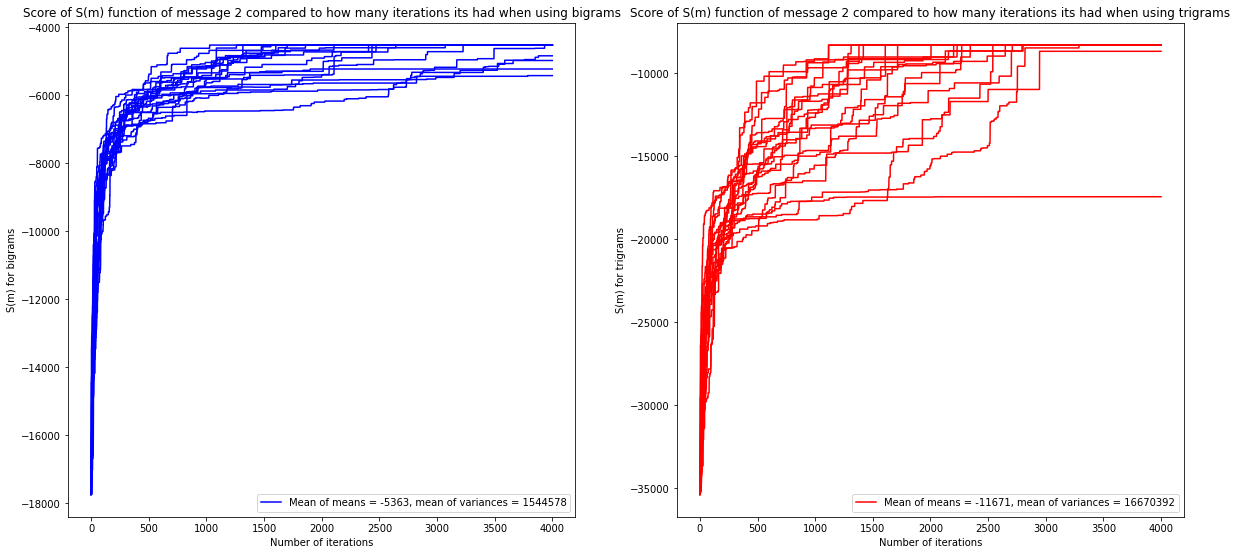

Through doing multiple runs, we can see what the average path of a bigram and trigram is. Trigrams tend to get stuck more, at around `-16000`, giving a greater variation in convergence.  The results are more varied for trigrams so we are more likely to get an inaccuarate result. For such a long message as coded message 2 the use of bigrams is better and especially more efficient at getting the correct answer.

We also can look at a shorter, and therefore more difficult, code to break (in this case coded message 7).

This is the code used to generate graphs below.


```
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
mean = []
var = []
# sampling metropolis2 100 times bigrams
for i in range(100):
    graph = metropolis2(codedMsg[6], probsEnglish2, 4000, T1([10,0.1]), {}, False, 2, False, 1e-10)[3]
    # calculating mean and variance of the sample
    mean.append(round(np.mean(graph)))
    var.append(round(np.var(graph)))
    # plotting the line of convergence of S
    plt.plot(graph, label = f'Run {i+1}',color='b' )

plt.ylabel('S(m) for bigrams')
plt.xlabel('Number of iterations')
plt.title('Score of S(m) function  of message 7 compared to how many iterations its had when using bigrams')
plt.legend([f'Mean of means = {round(np.mean(mean))}, mean of variances = {round(np.mean(var))}'])

plt.subplot(2,2,2)
mean_t = []
var_t = []
# sampling metropolis2 100 times bigrams
for i in range(100):
    graph = metropolis2(codedMsg[6], probsEnglish2, 4000, T1([10,0.1]), {}, False, 3, False, 1e-10)[3]
    # calculating mean and variance of the sample
    mean_t.append(round(np.mean(graph)))
    var_t.append(round(np.var(graph)))
    # plotting the line of convergence of S
    plt.plot(graph, label = f'Run {i+1}',color='r')

plt.ylabel('S(m) for trigrams')
plt.xlabel('Number of iterations')
plt.title('Score of S(m) function of message 7 compared to how many iterations its had when using trigrams')
plt.legend([f'Mean of means = {round(np.mean(mean_t))}, mean of variances = {round(np.mean(var_t))}'])
plt.show()
```



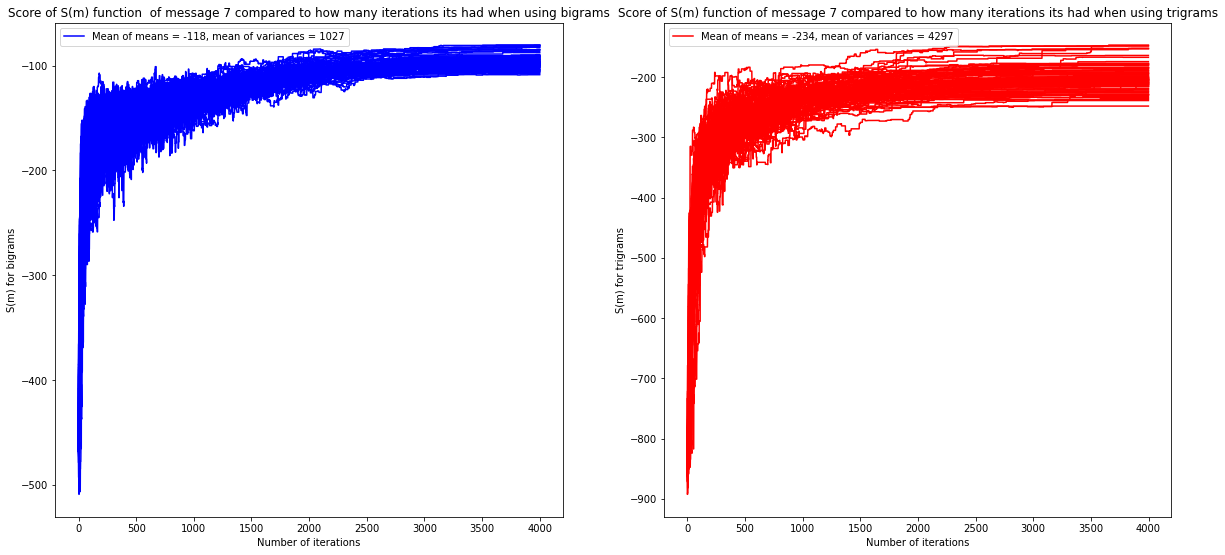

From the graphs above it is clear to see the variation in convergence from the bigram and trigram Metropolis algorithm. Using trigrams, we get a greater spread in convergence which indicates the issues with using larger n-grams. Despite working well with certain messages they can get stuck in a local optimum and not converge further. This can be a problem but, given the correct seed, they can converge nicely and even closer to a grammatically correct sentence than when using bigrams. In the next chapter we will see there different uses for decoding different messages, specifically for messages of different lengths.

# Decoding all the messages<a id=Decoding></a>

**Coded Message 3 and 4**

The next two messages require no more than the simple Metropolis algorithm to solve. Now that we have our optimised algorithm however, we can find the correct message even more efficiently. When using our new Metropolis algorithm we have to make sure to adjust our parameters specifically for each message.

In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[2], probsEnglish2, 4000, T1([10,0.1]), {}, True, 2, False, zero = 1e-5)
print(decodedMsg)

This outputs the decoded message:

CIPHERTEXTS PRODUCED BY A CLASSICAL CIPHER AND SOME MODERN CIPHERS WILL REVEAL STATISTICAL INFORMATION ABOUT THE PLAINTEXT AND THAT INFORMATION CAN OFTEN BE USED TO BREAK THE CIPHER AFTER THE DISCOVERY OF FREQUENCY ANALYSIS BY THE ARAB MATHEMATICIAN AND POLYMATH AL KINDI ALSO KNOWN AS ALKINDUS IN THE NINTH CENTURY NEARLY ALL SUCH CIPHERS COULD BE BROKEN BY AN INFORMED ATTACKER SUCH CLASSICAL CIPHERS STILL ENJOY POPULARITY TODAY THOUGH MOSTLY AS PUZZLES AL KINDI WROTE A BOOK ON CRYPTOGRAPHY ENTITLED RISALAH FI ISTIKHRAJ AL MUAMMA MANUSCRIPT FOR THE DECIPHERING CRYPTOGRAPHIC MESSAGES WHICH DESCRIBED THE FIRST KNOWN USE OF FREQUENCY ANALYSIS AND CRYPTANALYSIS TECHNIQUES AN IMPORTANT CONTRIBUTION OF IBN ADLAN WAS ON SAMPLE SIZE FOR USE OF FREQUENCY ANALYSIS

Our best guess at the punctuated version is:

"Ciphertexts produced by a classical cipher and some modern ciphers will reveal statistical information about the plaintext, and that information can often be used to break the cipher. After the discovery of frequency analysis by the Arab mathematician and polymath al-Kindi, also known as Alkindus in the ninth century, all such classical ciphers could be broken by an informed attacker. Such classical ciphers still enjoy popularity today, although mostly as puzzles. Al Kindi wrote a book on cryptography entitled Risalah fi Istikhraj al-Mu'amma manuscript for the deciphering cryptographic messages which described the first known use of frequency analysis and cryptanalysis techniques. An important contribution of Iban Adlan was on sample size for use of frequency analysis."


In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[3], probsEnglish2, 6000, T1([10,0.1]), {}, True, 2, False, zero = 1e-10)
print(decodedMsg)

Running this previously, with a specific seed, we managed to get the message:



```
Seed: 3940073469356524540
RJLHXTNERXWZEWZSXLESNIFWX TEKJAAS NYSVEW -19078
ZOLGRJFDZRWIDWISRLDSFUNWR JDPOAAS FTSHDW -15435
DOLGRPUEDRYIEYIMRLEMUBVYR PEFOAAM UTMNEY -1901
DOYGNPHEDNZIEZIMNYEMHBWZN PEFOAAM HUMREZ -5682
DOCKNTHEDNMAEMAINCEIHPWMN TELOFFI HUIREM -1457
DOCKNTHEDNMAEMAINCEIHPLMN TEGOSSI HUIREM -1427
DRLKNTH DNMA MAINL IHCSMNET GROOIEHPIU M -1889
GELMNTH GNUK UKINL IHCBUNAT DERRIAHOIP U -1488
FCLYNTG FNSH SHANL AGEOSNIT WCRRAIGBAP S -1834
CELBNTD CNSH SHANL ADMPSNIT WERRAIDYAO S -1055
CELKPTG CPSH SHAPL AGMUSPIT WENNAIGYAO S -1382
CEPFUTR CUSH SHAUP ARBMSUIT WENNAIRYAL S -1014
CEGFUTRICUSHISHAUGIARDMSU TIWEPPA RYALIS -1084
CIMVUPE CUSH SHAUM AEDYSUNP WILLANEFAT S -1429
CRMVUPN CUSH SHAUM ANOYSUIP DRLLAINFAT S -1079
CEMBUON CUXH XHAUM ANVYXUIO WELLAINGAT X -2548
CEMFUON CUSH SHAUM ANVYSUIO WELLAINXAT S -2706
CANBLOKRCLSHRSHELNREKGYSLIORWAMMEIKDETRS -1127
VANBLDK VLSH SHELN EKMUSLID WAGGEIKOET S -1976
CAJBUNF CUTH THEUJ EFMLTUIN WAPPEIFOES T -3351
WARKUNF WUTH THEUR EFPBTUIN CAQQEIFOES T -5719
WAOKUNX WUTH THEUO EXLVTUIN CAGGEIXRES T -1285
WARKUNX WUTH THEUR EXGVTUIN CALLEIXOES T -868
WARKUNX WUTH THEUR EXYBTUIN CALLEIXOES T -1202
WORKUNX WUTH THEUR EXFBTUIN COLLEIXAEM T -921
WORKINX WITH THEIR EXFCTIAN BOLLEAXUES T -2264
WOJKINX WITH THEIJ EXFMTIAN COLLEAXUES T -2957
WORKINP WITH THEIR EPFGTIAN COBBEAPUES T -867
WORKINF WITH THEIR EFYGTIAN COBBEAFUES T -833
WO KINFRWITHRTHEI REFYBTIANRCOLLEAFUESRT -1002
WORKINY WITH THEIR EYFBTIAN QOLLEAYUES T -3231
WORKINYEWITHETH IRE YFBTIANECOLL AYU SET -1308
WORNIKY WITH THEIR EYDBTIAK COLLEAYUES T -1533
WORKINY WITH THEIR EYGBTIAN COLLEAYUES T -807
WORKIUG WITH THEIR EGYBTIAU COLLEAGNES T -886
WORKING WITH THEIR EGYBTIAN COLLEAGUEJ T -4661
WOJKING WITH THEIJ EGYBTIAN COLLEAGUES T -2900
 ORKINGW ITHWTHEIRWEGYBTIANWCOLLEAGUESWT -1138
WYRKING WITH THEIR EGOBTIAN CYLLEAGUES T -1208
WORKBNG WBTH THEBR EGYPTBAN COLLEAGUES T -863
DORKING DITH THEIR EGYPTIAN COLLEAGUES T -817
WORKINGCWITHCTHEIRCEGYPTIANC OLLEAGUESCT -1458
WMRKING WITH THEIR EGYPTIAN CMLLEAGUES T -890
ROWKING RITH THEIW EGYPTIAN COLLEAGUES T -821
WOJKING WITH THEIJ EGYPTIAN COLLEAGUES T -2901
WORKING WITH THEIR EGYPTIAN COLLEAGUES T -785
WORKIGN WITH THEIR ENYPTIAG COLLEANUES T -826
WORKINGHWIT HT EIRHEGYPTIANHCOLLEAGUESHT -1154
WORKING WITH THZIR ZGYPTIAN COLLZAGUZS T -10216
WYRKING WITH THEIR EGOPTIAN CYLLEAGUES T -1201
WORKING WITD TDEIR EGYPTIAN COLLEAGUES T -898
WORKING WITH THEIR EGYPTIAN COLLEAGUES T -774
WORKINGSWITHSTHEIRSEGYPTIANSCOLLEAGUE ST -1618
WORKING WITH THEIR EGYSTIAN COLLEAGUEP T -824
WORKING WITH THEIR EGYUTIAN COLLEAGPES T -808
WORKIQG WITH THEIR EGYPTIAQ COLLEAGUES T -5373
WORKING WITH THQIR QGYPTIAN COLLQAGUQS T -7595
WORKICG WITH THEIR EGYPTIAC NOLLEAGUES T -880
WORKING WIEH EHTIR TGYPEIAN COLLTAGUTS E -985
WORKICG WITH THEIR EGYPTIAC NOLLEAGUES T -880
WORKING WITH THEIR EGYPTIAN UOLLEAGCES T -837
WORKINGYWITHYTHEIRYEG PTIANYCOLLEAGUESYT -1414
KORWING KITH THEIR EGYPTIAN COLLEAGUES T -802
WORKING WITH THEIR EGYPTIAN COXXEAGUES T -1196
WOAKING WITH THEIA EGYPTIRN COLLERGUES T -852
WORKINGFWITHFTHEIRFEGYPTIANFCOLLEAGUESFT -1117
WORKINGXWITHXTHEIRXEGYPTIANXCOLLEAGUESXT -15421
WORKIMG WITH THEIR EGYPTIAM COLLEAGUES T -834
WORKING WITH THEIR EGLPTIAN COYYEAGUES T -837
WORKING WITS TSEIR EGYPTIAN COLLEAGUEH T -903
WORKING WITH THEIR EGYCTIAN POLLEAGUES T -781
WERKING WITH THOIR OGYPTIAN CELLOAGUOS T -832
WONKIRG WITH THEIN EGYPTIAR COLLEAGUES T -810
WORKING WIEH EHTIR TGYPEIAN COLLTAGUTS E -985
WORKING WITH THFIR FGYPTIAN COLLFAGUFS T -1288
WORKING WITH THEIR EGYPTIAN COLLEAGUES T -792
WORKING WIYH YHEIR EGTPYIAN COLLEAGUES Y -1230
WORKING WITH THEIR EGYCTIAN POLLEAGUES T -781
WORKING WITB TBEIR EGYPTIAN COLLEAGUES T -868
WORKING WITH THEIR EGYPTIAN COSSEAGUEL T -819
WORKING WITH THMIR MGYPTIAN COLLMAGUMS T -1303
WORKING WITH THEIR EGYVTIAN COLLEAGUES T -787
WORHING WITK TKEIR EGYPTIAN COLLEAGUES T -879
WORKING WITH THEIR EGYPTIAN COLLEAGDES T -848
WORKING WITH THEIR EGYPTIAN COLLEAGUES T -1120
WORKING WITH THEIR EGYPTIAN COLLEAGUES T -817
WORKING WILH LHEIR EGYPLIAN COTTEAGUES L -890
W RKINGOWITHOTHEIROEGYPTIANOC LLEAGUESOT -938
WORKUNG WUTH THEUR EGYPTUAN COLLEAGIES T -801
WORKING WITH THEIR EGYPTIAN LOCCEAGUES T -807
WORKING WITH THEIR EGYPTIAN COLLEAGUES T -1161
WORKINGAWITHATHEIRAEGYPTI NACOLLE GUESAT -902
WORKING WITH THEIR EGYPTIAN DOLLEAGUES T -801
WONKIRG WITH THEIN EGYPTIAR COLLEAGUES T -810
WORKIPG WITH THEIR EGYNTIAP COLLEAGUES T -848
WORKING WITH THEIR EGYPTIAN COLLEAGMES T -826
EORKING EITH THWIR WGYPTIAN COLLWAGUWS T -1322
WORKING WITH THEIR EGYPTIAN COLLEAGUEX T -2269
WORKINV WITH THEIR EVYPTIAN COLLEAVUES T -805
 ORKINGW ITHWTHEIRWEGYPTIANWCOLLEAGUESWT -1135
WORKING WITH THEIR EGYPTIAN COLLEAGUES THE DUTCH CONSULTANTS WERE RUNNING NUMBERS BOSKALISS ROLE WAS BASICALLY TO DO THE CALCULATIONS THE SUMS BERDOWSKI SAID SO WHEN THE STERN CAME FREE ON MONDAY MORNING WE CALCULATED THAT WE SHOULD LET TONNES OF WATER BALLAST IN AT THE REAR OF THE VESSEL TO PUSH THE STERN DOWN AND LIFT THE BOW
```



This outputs the decoded message:

WORKING WITH THEIR EGYPTIAN COLLEAGUES THE DUTCH CONSULTANTS WERE RUNNING NUMBERS BOSKALISS ROLE WAS BASICALLY TO DO THE CALCULATIONS THE SUMS BERDOWSKI SAID SO WHEN THE STERN CAME FREE ON MONDAY MORNING WE CALCULATED THAT WE SHOULD LET TONNES OF WATER BALLAST IN AT THE REAR OF THE VESSEL TO PUSH THE STERN DOWN AND LIFT THE BOW.

Our best guess at the punctuated version is:

"Working with their Egyptian colleagues, the Dutch consultants were running numbers. Boskalis's role was basically to do the calculations. The sums Berdowski said so when the stern came free on Monday morning, we calculated that we should let tonnes of water ballast in at the rear of the vessell to push the stern down and lift the bow."

**Coded Message 5**

Message 5 is the first considerably short message which makes it much harder for the algorithm to give a complete answer without any user input. Initially we attempt this using the bigram `metropolis2` algorithm.

In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[4], probsEnglish2, 10000, T1([10,0.1]), {}, True, 2, False, zero = 1e-10)
print(decodedMsg)

Running the cell previously with a specific seed we got:



```
Seed: 4312104217487929661
IZWLXSZF QEFLZTQUVLSZMIHZCIVLUZEDDZIUPZX -1130
AEDIFNESTL SIEMLHPINEKACEWAPIHE YYEAHGEF -478
AOPEGDONHY NEOKYBUEDOZACOTAUEBO FFOABSOG -472
AOM WBOFHEIF OZECK BOLAYOTAK COIVVOACPOW -436
OAQ MWASHEIS AREZK WAVOCATOK ZAIPPAOZDAM -446
IAQ NPAKHEOK ALERM PAYIBATIM RAOSSAIRVAN -417
EIP MLIRCUSR IZUDW LIJEFITEW DISNNIEDVIM -491
RIU PGILMNCL IANDW GIBRSIERW DICHHIRDVIP -481
CIXTNRIKDSMKTIWSHFTRIGCOI CFTHIMUUICHLIN -489
OIXTNCIRMSDRTIWSBATCIGOPI OATBIDYYIOBLIN -486
TRWISFRYHANYIRKAMUIFRLTBR TUIMRNCCRTMPRS -435
TALIWVAHPRYHIAKRCUIVANTDA TUICAYFFATCMAW -431
LAKENHAPGIMPEASIDUEHACLFA LUEDAMRRALDVAN -529
A PWYE JOLTJW CLMVWE BAK IAVWM TRR AMS Y -541
A JEGY WLTOWE RTNVEY PAS IAVEN OZZ ANM G -414
A VEXM WTIOWE PINKEM HAD RAKEN OLL ANZ X -378
A NEDQ MPOIME CORZEQ YAT LAZER ISS ARK D -396
A LECH ZPOUZE MONTEH WAK RATEN USS ANY C -388
A JEWT HPOUHE SONGET MAD LAGEN URR ANY W -460
A MERT DPGUDE BGNVET HAS LAVEN UCC ANY R -402
A KECN MBOUME PORDEN VAH TADER UGG ARY C -378
A VEBR CYOUCE WONXER MAP TAXEN UDD ANG B -371
A VEYF IHOUIE WONKEF MAL TAKEN UPP AND Y -413
A VEYF BHOLBE WONKEF JAR TAKEN LPP AND Y -362
AOZEDIOWH RWEOP NKEIOMAFOTAKENORLLOANYOD -402
A BEDR WHIOWE PINKER CAL TAKEN OFF ANG D -340
A VEDY WHIOWE JINKEY CAS TAKEN ORR ANL D -326
A VEPY WHIOWE JIGCEY MAS TACEG ODD AGR P -335
A MEWR LHIOLE BINKER PAV TAKEN ODD ANY W -381
A PEKY WHIOWE RINCEY VAS TACEN OLL AND K -339
A ZERM SHIOSE WINKEM GAD TAKEN OLL ANY R -348
G VELY WHOIWE MODKEY PGN TGKED ICC GDR L -412
F VEAY SHOISE WORKEY CFL TFKER INN FRD A -374
A VEGY THOITE JONKEY FAS LAKEN IPP AND G -347
A VECY KHOIKE FORNEY WAS TANER IPP ARD C -314
A BEMY KWOIKE FORGEY HAS TAGER IPP ARD M -345
A KEMY CHOICE GORNEY WAS TANER IFF ARD M -315
A JEBY GHIOGE CIRNEY WAS TANER OFF ARD B -334
A JEMY GHOIGE CORKEY WAS TAKER IFF ARD M -321
A JEMY CHOICE PORNEY WAS TANER IFF ARX M -327
A LEMY CHOICE PONBEY WAR TABEN IFF AND M -389
A RKMY CHOICK PONBKY WAS TABKN IFF AND M -470
A REMY CHOICE PONBEY WAS TABEN ILL AND M -404
M REAY GHOIGE FONVEY WMS TMVEN ILL MND A -352
A MEPY CHOICE FONVEY WAS TAVEN ILL AND P -308
A MERY CHOICE FONKEY WAZ TAKEN IPP AND R -355
A MEHY GROIGE FONKEY WAS TAKEN IPP AND H -317
A MERY GHOKGE FONIEY WAS TAIEN KPP AND R -360
A MERY CIOHCE FONKEY WAS TAKEN HLL AND R -335
ANVERYNCHOICENFO KEYNWASNTAKE NILLNA DNR -415
A VEIY CHORCE FONKEY WAS TAKEN RPP AND I -340
A VERY CHOICE PODKEY WAS TAKED IMM ADN R -309
A VERY CHOICE FONKEY WAJ TAKEN IMM AND R -370
A VERY GPOIGE FONKEY WAS TAKEN IMM AND R -323
A VCRY GHOIGC FONKCY WAS TAKCN IPP AND R -446
A VERY GHOIGE MONKEY WAZ TAKEN IPP AND R -350
A VERY GHOIGE MONKEY WAS LAKEN IPP AND R -333
A VEPY GHOIGE FONKEY WAS TAKEN IRR AND P -304
A VEOY GHRIGE FRNKEY WAS TAKEN IMM AND O -318
A NERY CHOICE FOVKEY WAS TAKEV IMM AVD R -347
A VERY CHOICE FOLKEY WAS TAKEL IMM ALD R -309
A VERY CHOICE FONKEY WAS TAKEN IMM AND R -299
AFVERYFCHOICEF ONKEYFWASFTAKENFIMMFANDFR -423
A VERY CHOICE SONKEY WAF TAKEN IMM AND R -306
A VERY CHONCE FOIKEY WAS TAKEI NMM AID R -329
A VERY CHOICE FONKEY WAS TAKEN IMM AND R -313
A VERY COHICE FHNKEY WAS TAKEN IMM AND R -321
A VERY CHOICE FONKEY WAS TAKEN IMM ANX R -310
A VERY CHOICE FONKEY WAS QAKEN IMM AND R -578
AHVERYHC OICEHFONKEYHWASHTAKENHIMMHANDHR -403
A VERY CHOICE FODKEY WAS TAKED IMM ADN R -308
A VERQ CHOICE FONKEQ WAS TAKEN IMM AND R -335
AOVERYOCH ICEOP NKEYOWASOTAKENOIMMOANDOR -369
A VERY CHOICE PONSEY WAK TASEN IMM AND R -315
L VERY CHOICE MONKEY WLS TLKEN IPP LND R -336
A VERY CHOICE MOXKEY WAS TAKEX IPP AXD R -355
AGVERYGCHOICEGPONKEYGWASGTAKENGIMMGANDGR -443
A VERY CHOICE PONKEY WAS XAKEN IMM AND R -434
A VERY KHOIKE PONCEY WAS TACEN IMM AND R -301
A VERY GHOIGE MONKEY WAS TAKEN IXX AND R -325
A VERY GHOIGE PONKEY WAS TAKEN IMM AND R -296
A VERY GOHIGE FHNKEY WAS TAKEN IMM AND R -321
A VESY GHOIGE FONKEY WAR TAKEN IMM AND S -301
A VERY GHTIGE FTNKEY WAS OAKEN IMM AND R -350
A IERY GHOVGE FONKEY WAS TAKEN VMM AND R -447
A REVY GHOIGE FONKEY WAS TAKEN IMM AND V -305
A CERY VHOIVE FONKEY WAS TAKEN IMM AND R -318
A VERY CHOICE FONKEY WAS DAKEN IMM ANT R -331
ASVERYSCHOICESFONKEYSWA STAKENSIMMSANDSR -363
K VERY CHOICE FONAEY WKS TKAEN IMM KND R -367
A VERY CHOICE FONKEY WAS TAKEN IMM AND R -294
A VERY CHOICE FONKEY WAS TAKEN IMM AND R -294
A VERY JHOIJE FONKEY WAS TAKEN IMM AND R -322
A VERY CHOICE FONKEY BAS TAKEN IMM AND R -303
A VERZ CHOICE FONKEZ WAS TAKEN IMM AND R -335
ATVERYTCHOICETFONKEYTWAST AKENTIMMTANDTR -367
A VEFY CHOICE RONKEY WAS TAKEN IMM AND F -304
T VERY CHOICE FONKEY WTS ATKEN IMM TND R -355
A VERY CHOICE FONKEY WAS TAKEN IMM AND R -294
A VEJY CHOICE FONKEY WAS TAKEN IMM AND J -331
A VERY CHOICE FONKEY WAS TAKEN IMM AND REQUSED TO EAT IT WAS THOUGHT HOWEVER THAT ITS ALLETITE FIGHT BE STIFUMATED BY A LINEALLME
```



As you can see, this gives something close to a sentence that is not too difficult to understand. However, some swaps will be needed and the last word of the sentence is currently illegible. This wouldn't be too challenging to manually decipher but our optimised algorithm now gives us the option to consider trigram probabilities instead.

In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[4], probsEnglish2, 12000, T1([10,0.1]), {}, True, 3, False, zero = 1e-10)
print(decodedMsg)

We ran this separately and got the fully decoded message:



```
IZWLXSZF QEFLZTQUVLSZMIHZCIVLUZEDDZIUPZX -2299
SABUGNAW OEWUAROFKUNAYSHATSKUFAELLASFPAG -1155
SABEGYAT OITEADONKEYAWSHAMSKENAILLASNRAG -959
SABEGCAD OIDEAVONKECAYSHATSKENAILLASNMAG -881
SAHEDWAX OPXEAVORYEWAISNATSYERAPLLASRMAD -1022
SAMEDWAX OIXEAVONCEWARSPAYSCENAILLASNHAD -1037
SAYEHWAC OICEAVOFDEWANSRATSDEFAILLASFPAH -875
SAYEHWAC OICEAFODBEWANSMATSBEDAILLASDUAH -944
SAYE WABHOUBEAMONFEWAKSCATSFENAURRASNLA  -840
SAYEDWABHOIBEAJORPEWAKSCATSPERAIMMASR AD -902
SAXEDWAKHOIKEANO CEWAVSPATSCE AIRRAS MAD -908
GAXEDWAYHOIYEACO MEWALGPATGME AIRRAG NAD -1013
SAXEDWALHOILEABO VEWANSFATSVE AIRRAS MAD -966
SAYEDWALHOILEACOFBEWANS ATSBEFAIRRASFMAD -873
SAFEMWALHOILEACOKBEWANS ATSBEKAIRRASKDAM -840
SAGEDFALHOILEACOKBEFANS ATSBEKAIRRASKMAD -911
 AXEDFALWOILEACOKBEFAN SAT BEKAIRRA KMAD -932
 AXEDWAZHOIZEACOKBEWAN LAT BEKAIRRA KMAD -875
 ADEVWASHOISEACORBEWAK NAT BERAILLA RMAV -830
A VEYX RHOIRE BOSNEX DAM TANES ILL ASP Y -762
A VETS CHOICE BORKES NAM WAKER IFF ARY T -893
A PERY CHOICE BONKEY WAX TAKEN IFF ANS R -751
ANPERYNCHOICENBO KEYNWAMNTAKE NILLNA SNR -1005
A BTRY CHOICT DONKTY WAM EAKTN ILL ANS R -1085
A VURY CHOICU BONKUY WAM TAKUN ILL ANS R -931
S VERP CHOICE BONKEP WSM TSKEN IFF SND R -813
A VERY CHOICE BONKEY WAS TAKEN IFF AND R -677
A VEPY CHOICE RONKEY WAS TAKEN IFF AND P -592
A VERY CHOICE PONKEY DAS TAKEN ILL ANW R -619
W VERY CHOICE FONKEY AWS TWKEN ILL WND R -821
A VERY CHOICE FONKEY MAS TAKEN ILL AND R -582
A VERY CHZICE FZNKEY WAS TAKEN ILL AND R -805
A VERY LHOILE FONKEY WAS TAKEN ICC AND R -660
A VERY CHTICE MTNKEY WAS OAKEN ILL AND R -793
A VERY CHOICE MONKEY WAS TAKEN ILL AND R -616
A IERY CHOVCE MONKEY WAS TAKEN VLL AND R -924
A VERY CHOICE MOPKEY WAS TAKEP ILL APD R -638
A VERY CTOICE MONKEY WAS HAKEN ILL AND R -738
A VERY CHOICE MONUEY WAS TAUEN ILL AND R -696
A CERY VHOIVE MONKEY WAS TAKEN ILL AND R -612
A VERY CHOICE MONSEY WAK TASEN ILL AND R -642
A GERY CHOICE MONKEY WAS TAKEN ILL AND R -666
A VERY CHOICE MONXEY WAS TAXEN ILL AND R -607
A VERY CHOICE SONKEY WAM TAKEN ILL AND R -591
A VERY CHOICE QONKEY WAS TAKEN ILL AND R -649
A VEOY CHRICE MRNKEY WAS TAKEN ILL AND O -728
X VERY CHOICE MONKEY WXS TXKEN ILL XND R -935
A VERY CDOICE MONKEY WAS TAKEN ILL ANH R -803
AXVERYXCHOICEXMONKEYXWASXTAKENXILLXANDXR -1549
A VERP CHOICE MONKEP WAS TAKEN ILL AND R -641
A VERY CHOICE MOQKEY WAS TAKEQ ILL AQD R -760
A VERY CHOICE PONKEY WAS TAKEN ILL AND R -578
A VERY CHOICE QONKEY WAS TAKEN ILL AND R -648
A VERY CHOICE MONKEY WAS TAKEN ILL ANF R -595
A VERY CBOICE MONKEY WAS TAKEN ILL AND R -716
A VERY CHBICE MBNKEY WAS TAKEN ILL AND R -724
A VERY CHOICE MONKEY WAS TAKEN ILL AND R -660
A VERY CHOICE MONKEY WAB TAKEN ILL AND R -646
AFVERYFCHOICEFMONKEYFWASFTAKENFILLFANDFR -1020
A VERY CHOICE GONKEY WAS TAKEN ILL AND R -632
A VERY CHOICE MONJEY WAS TAJEN ILL AND R -594
A VWRY CHOICW MONKWY EAS TAKWN ILL AND R -995
A VERY NHOINE MOCKEY WAS TAKEC ILL ACD R -627
A VERY CHOICE MONKEY WAS TAKEN ILL AND R -572
A VERY CWOICE MONKEY HAS TAKEN ILL AND R -720
A VERY CHOICE MOKNEY WAS TANEK ILL AKD R -615
A VERY CHOICE MONKEY WAS TAKEN IXX AND R -653
A VEPY CHOICE MONKEY WAS TAKEN ILL AND P -594
A VECY RHOIRE MONKEY WAS TAKEN ILL AND C -591
A TERY CHOICE MONKEY WAS VAKEN ILL AND R -972
A VERY WHOIWE MONKEY CAS TAKEN ILL AND R -594
A VERL CHOICE MONKEL WAS TAKEN IYY AND R -692
A VERY CHOICE MONZEY WAS TAZEN ILL AND R -580
A VERY CHOICE MONKEY WAS TAKEN ILL AND R -548
A VERY CHOICE MONKEY WAS JAKEN ILL AND R -1122
A VERY CHOICE MONKEY WAS TAKEN ILL AND R -632
A VERY CHOBCE MONKEY WAS TAKEN BLL AND R -836
A VERY CHOICE MONKEY WAS TAKEN ILL AND R -548
A VERY JHOIJE MONKEY WAS TAKEN ILL AND R -640
A VERY CHOICE SONKEY WAM TAKEN ILL AND R -591
AWVERYWCHOICEWMONKEYW ASWTAKENWILLWANDWR -968
A VERY CHOICE MONKEY WAS TAKEN ILL ANU R -694
A MERY CHOICE VONKEY WAS TAKEN ILL AND R -570
D VERY CHOICE MONKEY WDS TDKEN ILL DNA R -831
A VERY QHOIQE MONKEY WAS TAKEN ILL AND R -641
A VKRY CHOICK MONEKY WAS TAEKN ILL AND R -1054
A REVY CHOICE MONKEY WAS TAKEN ILL AND V -576
A VXRY CHOICX MONKXY WAS TAKXN ILL AND R -1197
A VERY CHOICE MONKEY WAD TAKEN ILL ANS R -608
A VERY CMOICE HONKEY WAS TAKEN ILL AND R -712
A IERY CHOVCE MONKEY WAS TAKEN VLL AND R -924
A VERL CHOICE MONKEL WAS TAKEN IYY AND R -692
A VERY CHOICE MONKEY WAS TAKEN ILL AND R -696
A VERY CHOICE MOFKEY WAS TAKEF ILL AFD R -619
A VERY CHOICE MONKEY WAU TAKEN ILL AND R -676
A VERT CHOICE MONKET WAS YAKEN ILL AND R -860
A VERY CHOWCE MONKEY IAS TAKEN WLL AND R -841
A VERY CHOICE MONKEY WAS TAKEN ILL AND R -650
A VORY CHEICO MENKOY WAS TAKON ILL AND R -663
A VERY CHOICE MONKEY WAS TAKEN ILL AND R -653
A VERY CHOICE MONKEY WAS TAKEN ILL AND REFUSED TO EAT IT WAS THOUGHT HOWEVER THAT ITS APPETITE MIGHT BE STIMULATED BY A PINEAPPLE
```



This outputs the decoded message:

A VERY CHOICE MONKEY WAS TAKEN ILL AND REFUSED TO EAT IT WAS THOUGHT HOWEVER THAT ITS APPETITE MIGHT BE STIMULATED BY A PINEAPPLE

Our best guess at the punctuated version is:

"A very choice monkey was taken ill and refused to eat. It was thought, however, that its appetite might be stimulated by a pineapple."

Given the correct seed, using the `metropolis2` algorithm for trigrams gives a perfectly decoded message. It is clear from this that larger grams can give much better approximation for certain messages such as message 5. It seems that the length of the message might be a good indicator for the choice of gram; shorter messages may require a larger gram.

**Coded Message 6**

With coded message 6, due to its length, all that is required is to use our bigram `metropolis2` algorithm. This converges almost exactly to the correct decoded message. Below we will see that, given the correct seed, only one swap is needed to arrive at the final message.

In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[5], probsEnglish2, 8000, T1([10,0.1]), {}, True, 2, False, zero = 1e-10)
print(decodedMsg)

Again, running the algorithm separately we arrived at:



```
RVRRKZHKTVYPJCGVCHGVGXECUKRKZGRSKZKWGVGR -1808
RERRGWPGNEDAHI EIP E JKIUGRGW RSGWGY E R -802
OROOPWMPARDSKI RIM R JFINPOPW OUPWPH R O -773
OEOOPLYPNESTWA EAY E QKAUPOPL OFPLPI E O -748
OSOOIMNIASTPRE SEN S ZGEKIOIM OFIMIC S O -699
RSRRILNIASGOHE SEN S ZWEMIRIL RCILIT S R -708
RSRRALMAISGBTE SEM S WUEKARAL RCALAY S R -691
LELLORAOSEDCTN ENA E VUNBOLOR LMOROF E L -691
IOIIERSETOBCAU OUS O GFUHEIER IMERED O I -651
MOMMERBEPOSCAU OUB O NTUKEMER MIEREW O M -676
FOFFERPEIOSAKU OUP O LNUDEFER FHEREC O F -642
PSPPEDFEISLOAU SUF S RBUNEPED PHEDEG S P -638
BSBBERTEISLOAU SUT S DPUNEBER BYEREG S B -608
BSBBEVTEISLOAU SUT S MWUGEBEV BYEVEP S B -740
LSLLERUEISNACO SOU S MWOGELER LYERED S L -642
TSTTERDEISNAYO SOD S PUOMETER TCEREG S T -646
TSTTENWEISLHYODSOWDSDJUOFETENDTGENEMDSDT -801
TSTTANDAJSLHEO SOD S UIOBATAN TWANAM S T -737
TSTTZDLZUSMHEN SNL S JINBZTZD TWZDZY S T -1213
TOTTADGAFOPHEN ONG O JINSATAD TWADAU O T -617
TFTTARGAMFPHEN FNG F JINDATAR TWARAU F T -669
TOTTARDAMOPHEN OND O JINCATAR TWARAL O T -584
TOTTARDAMOPWEN OND O SINCATAR THARAL O T -609
TOTTARDASOP ENWONDWOWGINMATARWTHARALWOWT -743
MOMMARDASOPWEN OND O XINTAMAR MHARAL O M -624
TOTTQRDQBOPWAN OND O JINMQTQR THQRQS O T -1097
TATTERDEBALWON AND A JINKETER THERES A T -535
NANNERDEBALWOT ATD A JITKENER NHEREP A N -642
TATTERYEBALUIN ANY A JONKETER THEREF A T -542
WAWWERDEBALUIN AND A JONKEWER WHEREP A W -559
TATTERDECALOIN AND A JUNKETER THEREF A T -540
TOTTERDEBOLIAF OFD O MUFKETER THEREN O T -556
TOTTERDEBOLIAN OND O MUNKETER THERES O T -521
TATTERDEMALION AND A BUNKETER TYERES A T -559
TATTERDEWALION AND A JUNKETER THERES A T -504
TATTERFEMALION ANF A BUNKETER THERES A T -522
YAYYERDEMALION AND A JUNKEYER YHERES A Y -562
TATTERDEMALION AND A JUNKETER THERES A T -489
TATTERDEMALIONQANDQAQJUNKETERQTHERESQAQT -1425
TATTERDEYALION AND A JUNKETER THERES A T -515
TATTERDEMALION AND A JUNKETER TWERES A T -514
TATTGRDGMALION AND A JUNKGTGR THGRGS A T -612
TATTERDEMAPION AND A BUNKETER THERES A T -501
NANNERDEMALIOT ATD A BUTKENER NHERES A N -567
TATTERZEMALION ANZ A BUNKETER THERES A T -549
TATTERDEMALION AND A QUNKETER THERES A T -514
TATTECDEMALION AND A BUNKETEC THECES A T -515
TATTERDEMALION AND A QUNKETER THERES A T -474
TATTERDEMALION AND A QUNGETER THERES A T -487
TATTERDEMALION AND A QUNKETER THERES A T -481
TATTERDEMALIUN AND A QONKETER THERES A T -524
TATTERDEMALION AND A QUNPETER THERES A T -498
TATTERDEMALION AND A QUNKETER THEREJ A T -559
TETTARDAMELION END E QUNKATAR THARAS E T -505
TATTERDEMALION AND A QUNKETER THERES A T -502
TATTERDEMALIOG AGD A QUGKETER THERES A T -542
TATTERDEMALION AND A QUNKETER THERES A T -487
TATTERDEMALION AND A QUNWETER THERES A T -494
TATTMRDMEALION AND A QUNKMTMR THMRMS A T -606
TATTERDEMALION AND A FUNKETER THERES A T -607
TATTERDEMALION AND A QUNKETER THERES A T -474
TUTTERDEMULION UND U QANKETER THERES U T -525
TATTPRDPMALION AND A BUNKPTPR THPRPS A T -595
TATTERDEMALION AND A BUNKETER TYERES A T -539
TATTVRDVMALION AND A BUNKVTVR THVRVS A T -887
TATTERDEMALIBN AND A OUNKETER THERES A T -544
TATTSRDSMALION AND A BUNKSTSR THSRSE A T -570
TATTERDEUALION AND A BMNKETER THERES A T -519
TATTERDEMALION AND A BQNKETER THERES A T -555
TATTERDEMALION AND A BUNKETER THERES A T -504
TATTEBDEMALION AND A RUNKETEB THEBES A T -523
TATTERDEMALIONKANDKAKBUN ETERKTHERESKAKT -768
TATTERDEMALION AND A BUNKETER THERES A T -474
TATTZRDZMALION AND A QUNKZTZR THZRZS A T -1105
TATTERDEMALION AND A QUNSETER THEREK A T -505
TATTECDEMALION AND A QUNKETEC THECES A T -514
TATTERDECALION AND A QUNKETER THERES A T -496
TATTSRDSMALION AND A QUNKSTSR THSRSE A T -570
TATTERDEMALION AND A QUNKETER TWERES A T -513
TATTERDEMANIOL ALD A QULKETER THERES A T -509
TATTKRDKMALION AND A BUNEKTKR THKRKS A T -670
TUTTERDEMULION UND U BANKETER THERES U T -525
TATTERDEMAHION AND A QUNKETER TLERES A T -524
WAWWERDEMALION AND A QUNKEWER WHERES A W -494
THTTERDEMHLION HND H QUNKETER TAERES H T -596
QAQQERDEMALION AND A BUNKEQER QHERES A Q -822
TATTERDEMALION AND A QUNKETER THERES A T -537
TATTERDEMALION AND A QUNKETER TVERES A T -535
TATTREDRMALION AND A QUNKRTRE THRERS A T -531
TRTTEADEMRLION RND R BUNKETEA THEAES R T -532
TATTERDEMALION AND A BFNKETER THERES A T -526
TATTERDEMALION AND A BJNKETER THERES A T -544
TATTERDEMALION AND A BUNKETER THERES A T -487
XAXXERDEMALION AND A BUNKEXER XHERES A X -644
TATTGRDGMALION AND A QUNKGTGR THGRGS A T -611
TATTERDEMALION AND A QUNKETER THERES A T -474
TATTERDEMALSON AND A BUNKETER THEREI A T -512
TATTERDEMALIVN AND A BUNKETER THERES A T -619
TATTERDEMALION AND A BUNKETER THERES A T -500
TATTERDEMALION AND A PUNKETER THERES A T -482
TATTERDEMALION AND A BUNKETER THERES A THIEF AND A DRAGONFLY TRUMPETER HES MY HERO FAIRY DANDY TICKLING THE FANCY OF HIS LADY FRIEND THE NYMPH IN YELLOW CAN WE SEE THE MASTER STROKE WHAT A QUAERE FELLOW
```

This requires only one swap, changing B to J. 



This outputs the decoded message:

TATTERDEMALION AND A JUNKETER THERES A THIEF AND A DRAGONFLY TRUMPETER HES MY HERO FAIRY DANDY TICKLING THE FANCY OF HIS LADY FRIEND THE NYMPH IN YELLOW CAN WE SEE THE MASTER STROKE WHAT A QUAERE FELLOW

Our best guess at a punctuated version is:

"Tatterdemalion and Junkter,

There's a thief and a dragonfly trumpeter, He's my hero,

fairy dandy tickling the fancy of his lady friend 

The nymph in yellow

Can we see the master stroke?

What a quaere fellow."

**Coded Message 7**

This message, like coded message 5, is particularly short so might require the use of the trigram or maybe even larger gram, but initially we will see how it fairs just using bigrams. 

In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[6], probsEnglish2, 50000, T1([10,0.1]), {}, True, 2, False, zero = 1e-5)
print(decodedMsg)

Clearly, it gets close enough for some understanding of the message but many swaps would be needed and often the first word is illegible. Now that we have the option, we will see whether running metropolis with a larger gram gives a better approximation. 

In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[6], probsEnglish2, 50000, T1([10,0.1]), {}, True, 5, False, zero = 1e-5)
print(decodedMsg)

After some adjustments we managed to find a seed and intial conditions that output a perfectly decoded message. Interestingly this required the use a 5-gram to decode.



```
Seed: 5605643096397643010
LOJ WUZCWKCTFHHFHTWUZFHQWMZEUW EAWKCWUZC -461
VTNGUAWDUKDLYSSYSLUAWYSXUZWHAUGH UKDUAWD -452
FK UJDTOJAOGZPPZPGJDTZPYJCTSDJUSVJAOJDTO -461
DGEQTWIATSAZUNNUNZTWIUNMTFICWTQCOTSATWIA -461
EDSUMRPIMZINTGGTGNMRPTGLMOPWRMUWKMZIMRPI -461
BJ DPYZGPQGEUMMUMEPYZUMKPAZRYPDRLPQGPYZG -461
UCONFLWXFKXTGBBGBTFLWGBQFRWDLFNDAFKXFLWX -457
JO UNTGVNZVMDEEDEMNTGDEYNCGFTNUFQNZVNTGV -461
FDQPUXAZUGZCJNNJNCUXAJNSUIAEXUPE UGZUXAZ -461
GEFDSBQLSXLTPKKPKTSBQPKHSMQRBSDRISXLSBQL -461
SJVHGWCUGZUEAXXAXEGWCAX GFCYWGHYQGZUGWCU -461
JLYGEWNOE OSITTITSEWNITQEANCWEGCBE OEWNO -454
WICVQLPRQNRJASSASJQLPASDQEP LQV ZQNRQLPR -460
 JRMSCAGSFGULPPLPUSCALPBSVAXCSMXHSFGSCAG -459
CTBSZFXMZOMLINNINLZFXINJZPXWFZSWQZOMZFXM -456
SMAPUQNLU LVEOOEOVUQNEOIUZNJQUPJRU LUQNL -461
SLBKEQPHEUHIGFFGFIEQPGFTEAPRQEKRMEUHEQPH -461
JEXSIHYKINKZTRRTRZIHYTRQIWY HIS FINKIHYK -433
ZNJD SHE LEAQVVQVA SHQVY BHIS DIM LE SHE -409
BVUS TNE MEOKHHKHO TNKHQ CNAT SAY ME TNE -428
VXUSKTHEKBEMROOROMKTHRONKWHATKSAYKBEKTHE -450
SRCX TBE HEGINNING TBIND WBJT XJO HE TBE -404
YORM THE BEGIFFIFG THIFK WHAT MAD BE THE -331
FVRM THS BSGINNING THINK WHAT MAY BS THS -346
DQOW THE BEGINNING THINK MHAT WAY BE THE -281
CDUL THE BEGINNING THINK WHAT LAY BE THE -267
TFSO PHE BEGINNING PHIND WHAP OAK BE PHE -374
XPOMNTHENBEGI  I GNTHI DNWHATNMAYNBENTHE -441
LORM WHE BEGINNING WHIND THAW MAY BE WHE -326
XZPS TGE BEHINNINH TGIND WGAT SAY BE TGE -403
ZUPS THE REGINNING THIND WHAT SAY RE THE -282
KVJLATHEABEGINNINGATHINDAWH TAL YABEATHE -405
CXUS THE BEGINNING THINK WHAT SAY BE THE -260
VOUS THE BEWINNINW THINK GHAT SAY BE THE -319
ROUS THE BELINNINL THINK WHAT SAY BE THE -291
PRDS THC BCGINNING THINK WHAT SAY BC THC -349
QJXS THE BEGINNING THINK WHCT SCY BE THE -308
ZORS THE BEGINNING THINK DHAT SAY BE THE -275
CROM THE BEGINNING THINK WHAT MAY BE THE -250
FRPM THE BEGINNING THINK WHAT MAY BE THE -262
FROM TQE BEGINNING TQINK WQAT MAY BE TQE -366
FROM THE BEGINNING THINZ WHAT MAY BE THE -259
FROM THE BEGINNING THINK WHAT MAY BE THE -243
FROM THE BEGINNING THIND AHWT MWY BE THE -291
FROM THE BEGWNNWNG THWNK IHAT MAY BE THE -325
FROM THE BEGINNING THINV WHAT MAY BE THE -261
FROQ THE BEGINNING THINK WHAT QAY BE THE -290
FQOM THE BEGINNING THIND WHAT MAY BE THE -257
FROW THE BEGINNING THIND MHAT WAY BE THE -281
SROM THE BEGINNING THIND WHAT MAY BE THE -250
FROM THE BEGIVVIVG THIVK WHAT MAY BE THE -306
FROM THE BEGIYYIYG THIYK WHAT MAN BE THE -312
FROM THE BEGINNING THINK WHAT MAY BE THE -239
FROM THE BEGINNING THIND WHAT MAY BE THE -242
FROM THE XEGINNING THIND WHAT MAY XE THE -292
FROM CHE BEGINNING CHIND WHAC MAY BE CHE -332
FRO MTHEMBEGINNINGMTHINDMWHATM AYMBEMTHE -424
FROM IHE BEGTNNTNG IHTNK WHAI MAY BE IHE -393
FROM THE BEGINNING THINK WHAT MAY BE THE -239
FROM THE BEGWNNWNG THWNK IHAT MAY BE THE -323
FROM THE BEGINNING THINK WHXT MXY BE THE -287
VROM THE BEGINNING THINK WHAT MAY BE THE -247
FROM THE BEGINNING THINK WHAT MAY BE THE -239
FROX THE BEGINNING THINK WHAT XAY BE THE -289
FROM UHE BEGINNING UHINK WHAU MAY BE UHE -351
FROM THE BEGINNING THINK WHAT MAY BE THE -239
FROM THE BEQINNINQ THINK WHAT MAY BE THE -290
FROMNTHENBEGI  I GNTHI KNWHATNMAYNBENTHE -440
FROM THE BEGINNING THINK WHAT MAY BE THE -239
FRBM THE OEGINNING THINK WHAT MAY OE THE -299
FROQ THE BEGINNING THINK WHAT QAY BE THE -290
FROM CHE BEGINNING CHINK WHAC MAY BE CHE -335
FROM THE BEGINNING THINK WHAT MAY BE THE -239
FROC THE BEGINNING THINK WHAT CAY BE THE -281
FROM THE BEGINNING THINK WHAT MAY BE THE -241
FROM THE BEGINNING THINK WHAT MAY BE THE -239
FIOM THE BEGRNNRNG THRNK WHAT MAY BE THE -312
FROM THE BEGINNING THINU WHAT MAY BE THE -255
FROM THE BEGINNING THINK WHCT MCY BE THE -284
FROM TSE BEGINNING TSINK WSAT MAY BE TSE -352
FROM THI BIGENNENG THENK WHAT MAY BI THI -363
FROM THE BEGINNING THINK WHAT MAY BE THE -239
AROM THE BEGINNING THINK WHFT MFY BE THE -295
FROMBTHEB EGINNINGBTHINKBWHATBMAYB EBTHE -430
GROM THE BEFINNINF THINK WHAT MAY BE THE -289
FROM THE BEGXNNXNG THXNK WHAT MAY BE THE -302
FROM THE WEGINNING THINK BHAT MAY WE THE -280
FROM THQ BQGINNING THINK WHAT MAY BQ THQ -334
FROM THE BEGINNING THINK WHAT MAY BE THE -239
FROM THE BEGJNNJNG THJNK WHAT MAY BE THE -302
F OMRTHERBEGINNINGRTHINKRWHATRMAYRBERTHE -390
FRO MTHEMBEGINNINGMTHINKMWHATM AYMBEMTHE -418
FRUM THE BEGINNING THINK WHAT MAY BE THE -257
FROMVTHEVBEGINNINGVTHINKVWHATVMAYVBEVTHE -427
FROM THE BEGXNNXNG THXNK WHAT MAY BE THE -302
FROM THE BEGINNING THIND WHAT MAY BE THE -242
FROM THE BESINNINS THINK WHAT MAY BE THE -268
EROM THF BFGINNING THINK WHAT MAY BF THF -343
FROM THE BEGINNING THINK WHAT MAY BE THE -239
FROM NHE BEGITTITG NHITK WHAN MAY BE NHE -395
FROM THE BEGINNING THINK WHAT MAY BE THE END
```




The final decoded message is:

FROM THE BEGINNING THINK WHAT MAY BE THE END

Our best guess at a punctuated version is:

"From the beginning, think what may be the end."

**Coded Message 8**

This message can be worked out perfectly and very quickly with both the bigram and trigram `metropolis2` algorithm but using bigrams is more efficient in this situation. From below we can see that it can be solved in only 5000 iterations.

In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[7], probsEnglish2, 5000, T1([10,0.1]), {}, True, 2, False, zero = 1e-5)
print(decodedMsg)

Below we have a decoding that we have performed previously:



```
EYENXRPSURPGUUIRKSUGURSHYY NXRCUUIREPRCH -1138
EDEKNRYSORY OOTRXSO ORSUDDHKNRIOOTREYRIU -1096
ECEPIRYSXRY XXARDSX XRSUCCMPIRKXXAREYRKU -1271
ECELIRYSARY AATRDSA ARSNCCMLIRUAATREYRUN -993
ECELP YST YRTTA WSTRT SNCCULP VTTA EY VN -939
EMELK YIT YRTTA WITRT INMMULK BTTA EY BN -936
TNTRK GHE GSEEI FHESE HWNNURK BEEI TG BW -851
TPTLY WHE WSEEI FHESE HNPPMLY BEEI TW BN -879
ZSZLY WHE WNEEI FHENE HRSSCLY UEEI ZW UR -1040
ABALS WHE WNEEI KHENE HRBBULS TEEI AW TR -832
ABALD WHE WNEEI SHENE HRBBULD CEEI AW CR -792
ATAND WHS WESSY PHSES HLTTUND CSSY AW CL -890
AYAND WHE WSEET GHESE HBYYUND FEET AW FB -804
AXAND FHE FSEET GHESE HBXXOND REET AF RB -827
AXAND WHE WSEET MHESE HBXXIND GEET AW GB -799
AXAND WHE WSEET UHESE HBXXIND FEET AW FB -798
AZAND WHE WSEET VHESE HYZZIND MEET AW MY -769
AZANG WSE WHEET KSEHE SYZZING REET AW RY -801
AMANG WHE WSEET KHESE HYMMPNG REET AW RY -799
DMDNG WHE WSEET KHESE HYMMING REET DW RY -818
AFANG WHE WSEET CHESE HYFFING REET AW RY -728
AYAXG WHE WSEET CHESE HRYYIXG FEET AW FR -859
AYAQG WHE WSEET CHESE HRYYIQG FEET AW FR -923
APANG WHY WSYYT CHYSY HRPPING FYYT AW FR -829
AMANG CHE CTEES WHETE HRMMING PEES AC PR -723
AZANG WHE WLEES CHELE HRZZING UEES AW UR -719
ANAZG WHE WTEES CHETE HRNNIZG MEES AW MR -881
AZANG WHE WMEES CHEME HRZZING TEES AW TR -717
AFANG WHE WMEES CHEME HRFFING TEES AW TR -733
AKANG WYE WMEES CYEME YRKKING TEES AW TR -768
APANG WHE WMEES CHEME HRPPING TEES AW TR -724
APANG WHX WMXXS CHXMX HRPPING TXXS AW TR -1028
ATANG WHE WREES UHERE HMTTING PEES AW PM -720
ATANG WHE WREES CHERE HMTTING PEES AW PM -713
AWANG YHE YREES CHERE HMWWING PEES AY PM -722
AYANG THE TREES CHERE HMYYING FEES AT FM -701
AWANG THE TREES CHERE HMWWING FEES AT FM -668
AMANGT HET REESTCHERETHUMMINGTBEESTA TBU -811
AMAGN THE TREES CHERE HUMMIGN BEES AT BU -706
AMANG THE TREES VHERE HUMMING BEES AT BU -674
AMANG THE TREES CHERE HUMMING BEES AT BU -667
NMNAG THE TREES CHERE HUMMIAG BEES NT BU -775
AMANG THE TREES CHERE HYMMING BEES AT BY -667
AMANG RHE RTEES CHETE HUMMING BEES AR BU -710
AMANG THE TREES CHERE HUMMING BEES AT BU -644
AMANG THE TREES CHERE HUMMING BEES AT BU -672
AMANG THE TQEES CHEQE HUMMING BEES AT BU -857
AMANG THI TRIIS CHIRI HUMMENG BIIS AT BU -724
AMANG THE TREES CHERE HUMMING BEES AT BU -638
AMANG THE TREES CHERE HPMMING BEES AT BP -673
APANG THE TREEZ CHERE HUPPING BEEZ AT BU -785
APANGZTHEZTREESZCHEREZHUPPINGZBEESZATZBU -1344
APANG THE TREES CHERE HUPPING BEES AT BU -637
APANG THE TREES CHERE HUPPING BEES AT BU -662
APANG THE TREES WHERE HUPPING BEES AT BU -657
APAEG THN TRNNS WHNRN HUPPIEG BNNS AT BU -848
ABANG THE TREES WHERE HUBBING PEES AT PU -640
APANG THE TREES WHERE HUPPING BEES AT BU -633
APANG THE TREES WHERE HUPPING BEES AT BU -628
APANGRTHERT EESRWHE ERHUPPINGRBEESRATRBU -811
APANV THE TREES WHERE HUPPINV BEES AT BU -697
APAN GTHEGTREESGWHEREGHUPPIN GBEESGATGBU -923
APANG THE TREEM WHERE HUPPING BEEM AT BU -659
APANG THE TREES ZHERE HUPPING BEES AT BU -676
APANV THE TREES WHERE HUPPINV BEES AT BU -697
APATG NHE NREES WHERE HUPPITG BEES AN BU -755
APANX THE TREES WHERE HUPPINX BEES AT BU -691
APANG THE TREES WHERE HUPPBNG IEES AT IU -705
APANG THE TREES WHERE HUPPING BEES AT BU -628
APANG TYE TREES WYERE YUPPING BEES AT BU -694
AQANG THE TREES WHERE HUQQING BEES AT BU -681
APANG THE TREES WHERE HUPPING YEES AT YU -653
APANG THE TREES WHERE HUPPING BEES AT BU -655
AMANG EHT ERTTS WHTRT HUMMING BTTS AE BU -768
AMANG THE TREES WHERE HUMMING BEES AT BU -628
AMANG THE TREES WHERE HUMMYNG BEES AT BU -680
JMJNG THE TREES WHERE HUMMING BEES JT BU -904
AMANG EHT ERTTS WHTRT HUMMING BTTS AE BU -768
AMANG THE TREEI WHERE HUMMSNG BEEI AT BU -692
AMANG THE TREES WHERE HUMMKNG BEES AT BU -700
AMANG THE TDEES WHEDE HUMMING BEES AT BU -673
AMANG THE TREES WHERE HUMMING BEES AT BU -669
AOANG THE TREES WHERE HUOOING BEES AT BU -676
APANG WHE WREES THERE HUPPING BEES AW BU -656
APANG THE TREES WHERE HUPPING BEES AT BU -639
AMANGPTHEPTREESPWHEREPHUMMINGPBEESPATPBU -900
AMANG RHE RTEES WHETE HUMMING BEES AR BU -696
AMANG THE TREES WHERE HUMMONG BEES AT BU -651
AMANG TDE TREES WDERE DUMMING BEES AT BU -730
AMANF THE TREES WHERE HUMMINF BEES AT BU -664
AMANG THE TREEX WHERE HUMMING BEEX AT BU -745
AMANK THE TREES WHERE HUMMINK BEES AT BU -649
AMANG THE TREES WHERE HUMMING BEES AT BU -654
AMANG THE TREES WHERE HXMMING BEES AT BX -684
AMANG THE TREES WHERE HUMMING BEES AT BU -628
APANX THE TREES WHERE HUPPINX BEES AT BU -691
APANG TME TREES WMERE MUPPING BEES AT BU -684
APANG THE TREES WHERE HUPPING BEES AT BU -628
QMQNG THE TREES WHERE HUMMING BEES QT BU -886
AMANG THE TREEC WHERE HUMMING BEEC AT BU -685
AMANG THE TREES WHERE HUMMING BEES AT BUDS AND FLOWERS WERE HINGING O AULD CALEDON DREW OUT HE DRONE AND TO HER PIPE WAS SINGING O TWAS PIBROCH SANG STRATHSPEYS AND REELS SHE DIRLD THEM AFF FU CLEARLY O WHEN THERE CAM A YELL O FOREIGN SQUEELS THAT DANG HER TAPSALTEERIE O
```



In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[7], probsEnglish2, 5000, T1([10,0.1]), {}, True, 3, False, zero = 1e-5)
print(decodedMsg)

The final decoded message is:

AMANG THE TREES WHERE HUMMING BEES AT BUDS AND FLOWERS WERE HINGING O AULD CALEDON DREW OUT HE DRONE AND TO HER PIPE WAS SINGING O TWAS PIBROCH SANG STRATHSPEYS AND REELS SHE DIRLD THEM AFF FU CLEARLY O WHEN THERE CAM A YELL O FOREIGN SQUEELS THAT DANG HER TAPSALTEERIE O

Our best guess at a punctuated version is:

"Amang the trees, where humming bees 

At buds and flowers were hinging, 

O, Auld Caledon drew out her drone, 

And to her pipe was singing, O. 

'Twas Pibroch, Sang, Strathpeys, and Reels, 

She dirl'd them aff fu' clearly, O, 

When there cam a yell o' foreign squeels, 

That dang her tapsalteerie, O!"

**Coded Message 9**

When running this message through the `metropolis2` algorithm using our English sample text we noticed that the algorithm tended to converge on a message that, by the spelling and structure of the words, seemed to be French. You can see this below.

In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[8], probsEnglish2, 10000, T1([10,0.1]), {}, True, 2, False, zero = 1e-3)
print(decodedMsg)

Even using the English sample text the message gets reasonably close to a grammatically correct sentence:



```
Seed: 2421280391441951146
WDYRDYLDQCSLR KTYDPYZ LXSKTYWDYQ U KTYZO -1907
ZD ID LDMBKLIRAY DE GRLCKAY ZD MRSRAY GO -1342
WA NA OAKBTONERY AI GEOPTRY WA KEQERY GH -1266
WE GE YENLIYGARS EK DAYPIRS WE NAUARS DM -1176
IE LE OENWJOLAUS EY MAODJUS IE NAFAUS MG -1292
METLETFENKIFLORSTEDTCOFPIRSTMETNOXORSTCB -1342
XE FE MEHLAMFURS ET YUMVARS XE HUPURS YN -1285
VE FE TENBATFURS EO WUTYARS VE NUPURS WL -1123
JE XE RENVARXUTS EO CURYATS JE NUHUTS CM -1169
FE BE RENMARBUTS EG JURKATS FE NUCUTS JH -1123
LE TE RENDURTAIS EG PARKUIS LE NABAIS PH -1112
CE PE RENLURPAIS ED FARZUIS CE NAXAIS FT -1087
VE PE REOLNRPAIS ED HARZNIS VE OAMAIS HT -1204
JE PE BENROBPAIF ED HABLOIF JE NAMAIF HT -1134
JE FE RENHGRFIAD EY SIRZGAD JE NIVIAD ST -1167
CE PE RENHORPIFD ES LIRXOFD CE NIVIFD LT -1153
WE ME RENHORMIAD ES PIRXOAD WE NIFIAD PT -1071
BE ME RENCORMIAD ES ZIRHOAD BE NIFIAD ZT -1061
VERMER ENBO MIASREDRHI WOASRVERNICIASRHT -1244
WEBMEBREN ORMIASBEDBFIRGOASBWEBNICIASBFT -1420
JE UE RENBORUIAS ED FIRGOAS JE NICIAS FT -1103
ZE CE RENYORCIAS ED FIRMOAS ZE NIPIAS FT -1054
JE LE RENBORLIAG ED MIRVOAG JE NIHIAG MT -1065
VE ME RENBORMIAS ED LIRWOAS VE NIPIAS LT -1031
VE ME UENBOUMAIS ED WAUGOIS VE NAPAIS WT -1059
VE NE REMBORNAIS ED WARFOIS VE MAPAIS WH -1060
YE LE RENBORLFIS ED WFRMOIS YE NFPFIS WH -1066
ME LE RENBDRLAIS EO WARKDIS ME NAPAIS WH -1143
JE FE RENBORFDIS EA TDRMOIS JE NDPDIS TH -1105
YE XE RENBORXAIS ED TARVOIS YE NAPAIS TH -1044
JE LE RENBORLAIS ED TARVOIS JE NACAIS TH -1042
JE LE RENBORLAIS ED WARVOIS JE NACAIS WH -1000
LE ME RENBORMAIS ED WARYOIS LE NACAIS WH -993
HE ME RENBORMAIS ED WARVOIS HE NACAIS WL -996
HE ME RENBORMDIS EA WDRVOIS HE NDCDIS WL -1078
HE ME RENDORMAIS EB WARVOIS HE NACAIS WL -1065
HE ME RENBORMAIP ED WARVOIP HE NACAIP WL -1074
WE ME RENBORMAIS ED HARKOIS WE NACAIS HL -1009
BE ME RENTORMAIS ED WARKOIS BE NACAIS WL -1004
WE ME RENTORMKIS ED BKRYOIS WE NKCKIS BL -1060
BECMECRENTORMAISCEDCWARYOISCBECNAGAISCWL -1284
BS MS RSNTORMAIE SD WARCOIE BS NAYAIE WL -1130
WE ME RENTORMAIS EY BARCOIS WE NAVAIS BL -1049
CE ME REUTORMAIS ED BARWOIS CE UAZAIS BL -1129
CE ME RENTORMAIS ED BARYOIS CE NAWAIS BL -1004
BE ME RENTORMAIS ED WARYOIS BE NAPAIS WL -1013
VE ME RENTORMAIS ED BARYOIS VE NACAIS BL -998
VE ME RENTORMAIS EW BARDOIS VE NACAIS BL -1051
KE ME RENTORMAIS ED BARWOIS KE NACAIS BZ -1064
PE FE RENTORFAIS ED BARVOIS PE NACAIS BL -1015
PE ME RENTORMAIS ED BARVOIS PE NACAIS BL -997
VE ME REPTORMAIS ED BARCOIS VE PANAIS BL -1061
VE WE RENTORWAIS ED BARCOIS VE NAPAIS BL -1008
VE ME RENTCRMAIS ED BAROCIS VE NAPAIS BL -1087
EV MV RVNTORMAIS VD BARCOIS EV NAPAIS BL -1451
VEIMEIRENTORMA SIEDIBARCO SIVEINAPA SIBL -1153
VE ME RENTORMAIQ ED BARYOIQ VE NACAIQ BL -1204
VE ME HENTOHMAIS ED BAHZOIS VE NACAIS BL -1066
VE ME RENTORMAIS ED BARJOIS VE NAWAIS BL -999
VE ME RENTORMAIS ED BARJOIS VE NAPAIS BL -1000
VE ME REUTORMAIS ED BARJOIS VE UACAIS BL -1119
EV MV RVNTORMAIS VD BARYOIS EV NACAIS BL -1450
WE ME RENTORMAIS ED BARYOIS WE NAVAIS BL -1000
WE ME RENAORMTIS ED BTRYOIS WE NTCTIS BL -1079
QE ME RENTORMAIS ED BARWOIS QE NACAIS BL -1037
KE ME RENTORMAIS ED BARWOIS KE NACAIS BL -993
KE ME RENAORMTIS ED BTRWOIS KE NTCTIS BL -1074
KO MO RONTERMAIS OD BARWEIS KO NACAIS BL -1085
KV MV RVNTORMAIS VD BARWOIS KV NACAIS BL -1458
KE ME CENTOCMAIS ED BACWOIS KE NARAIS BL -1048
XE ME RENTORMAIS ED BARKOIS XE NACAIS BL -1006
KE ME RENTORMAIC ED BARWOIC KE NASAIC BL -1073
KE ME RENTORMAIS ED BARWOIS KE NACAIS BL -1020
KE ME RENTBRMAIS ED OARWBIS KE NACAIS OL -1078
KECMECRENTORMAISCEDCBARWOISCKECNA AISCBL -1253
VE ME RENTORMAIS EK BARYOIS VE NACAIS BL -1038
VE ME RENTORMAIS ED BARYOIS VE NACAIS BL -989
VE ME RENTHRMAIS ED BARYHIS VE NACAIS BL -1064
VE JE RENTORJAIS ED BARYOIS VE NACAIS BL -1022
VE ME RENTORMAIS ED BARYOIS VE NACAIS BL -1063
VE ME REJTORMAIS ED BARYOIS VE JACAIS BL -1145
VE ME XENTOXMAIS ED BAXYOIS VE NACAIS BL -1089
VE ME RENTLRMAIS ED BARYLIS VE NACAIS BO -1084
VE ME RENTORMAIS ED XARYOIS VE NACAIS XL -1031
VE ME RENSORMAIT ED BARYOIT VE NACAIT BL -1007
VE ME HENTOHMAIS ED BAHYOIS VE NACAIS BL -1067
VN MN RNETORMAIS ND BARYOIS VN EACAIS BL -1198
VE ME RENTORMAIS ED BARYOIS VE NACAIS BJ -1040
DE ME RENTORMAIS EV BARYOIS DE NACAIS BL -1057
VE ME RENTORMAIS ED JARYOIS VE NACAIS JL -1017
VE ME RENTORMAIB ED SARYOIB VE NACAIB SL -1098
VE ME RENTORMAIS ED BARYOIS VE NACAIS BL -1011
VELMELRENTORMAISLEDLBARYOISLVELNACAISLB  -1241
VE ME RENTORMAID ES BARYOID VE NACAID BL -1005
VE ME RENTSRMAIO ED BARYSIO VE NACAIO BL -1098
VEFMEFRENTORMAISFEDFBARYOISFVEFNACAISFBL -1315
VY MY RYNTORMAIS YD BAREOIS VY NACAIS BL -1172
VE ME RENTWRMAIS ED BARYWIS VE NACAIS BL -1082
VE ME RENJORMAIS ED BARYOIS VE NACAIS BL -1021
VE ME RENTORMAIS ED BARYOIS VE NACAIS BL -1015
VE ME RENTORMAIS ED BARYOIS VE NACAIS BLUS QUE TE HOURDS RECEILS TUN INSDAND LE DEMBS TENDENTRE LES HRAQUEMENDS ORFANIQUES TES POISERIES TOUCRIR LES KEUG BOUR YIGER LE WALEITOSHOBE TE LOPSHURIDE TE FO DER FR HE UNE LUEUR MOMENDAN E TE HONSHIENHE LE SOMMEIL OU EDAIEND BLONF S LES MEUPLES LA HJAMPRE LE DOUD TOND VE NEDAIS QUUNE BEDIDE BARDIE ED A LINSENSIPILIDE TUQUEL VE REDOURNAIS CIDE MUNIR
```

We thought, however, it would be best to instead find a French sample text for this question. We found a French version of Jane Eyre which we will read and sort below.

In [ ]:
french_sample_text = processAnyText('https://www.gutenberg.org/files/16235/16235-8.txt', 'french.txt', 797)

Using our new sample text we can now calucate the probabilites and rerun the metropolis algorithm using the French sample text.


In [ ]:
probsFrench2 = Probs2(5, french_sample_text)

In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[8], probsFrench2, 4000, T1([10,0.1]), {}, True, 3, False, zero = 1e-3)
print(decodedMsg)

We managed to find a near perfect solution below:

```
Seed: 8749449819374576025
WDYRDYLDQCSLR KTYDPYZ LXSKTYWDYQ U KTYZO -2666
FAYNAYRAQCGRNET YAHYVERXGT YFAYQEKET YVO -2544
CA LA RAQTPRLIES AD NIRFPES CA QIJIES NO -2309
MA TA FACLDFTIUS AV YIFRDUS MA CIJIUS YB -2283
KA MA RATCPRMOUS AV GORFPUS KA TOJOUS GL -2162
KA CA RATMNRCOUS AV FORGNUS KA TOJOUS FL -2099
QA CA RAZMNRCOUS AV FORGNUS QA ZOJOUS FL -2142
QA CA RATMNRCOIS AV FORKNIS QA TOXOIS FL -2086
HA IA RATMGRIOCS AU PORKGCS HA TONOCS PL -2163
BA CA UATMRUCOIS AV POUKRIS BA TOGOIS PF -2154
WE CE UENLRUCOIS EV POUDRIS WE NOGOIS PM -2031
HE CE IENMRICOUS ET POIDRUS HE NOGOUS PL -1923
HE ME IENDRIMCUS ET PCIORUS HE NCGCUS PL -1940
CE ME IEQDRIMOUS ET POIWRUS CE QOGOUS PL -1996
CR MR IRNDEIMOUS RT POIBEUS CR NOYOUS PL -2106
CE ME RENDIRMOUS ET PORBIUS CE NOYOUS PL -1843
CEYMEYRENDIRMOUSYETYPORBIUSYCEYNO OUSYPL -2372
FE ME RENDIRMOUS ET PORWIUS FE NOZOUS PL -1864
CE ME RENDIRMOUY ET PORHIUY CE NOVOUY PL -1999
CE ME RENDWRMOIS ET PORHWIS CE NOGOIS PL -1838
CK MK RKNDARMOIS KT PORYAIS CK NOBOIS PL -2197
FE ME RENDARMOIS ET PORVAIS FE NOBOIS PL -1745
GE ME RENDARMOIS EU PORVAIS GE NOBOIS PL -1896
GE ME PENDAPMOIS ET ROPJAIS GE NOBOIS RL -1828
GE ME RENDXRMOIS ET PORVXIS GE NOFOIS PL -1801
GE ME JENDAJMOIS ET POJYAIS GE NOFOIS PL -1805
GE ME RENLARMOIS ET PORKAIS GE NOFOIS PD -1760
QE ME RENDARMOIS ET PORKAIS QE NOFOIS PL -1725
JE ME RENDARMOIS ET PORKAIS JE NOHOIS PL -1711
JE ME RENDIRMOAS ET PORFIAS JE NOVOAS PL -1817
JE ME RENDARMOIS ET PORBAIS JE NOVOIS PL -1707
DE ME RENJORMAIS ET PARFOIS DE NAVAIS PL -1666
JE ME RENDORMWIS ET PWRFOIS JE NWVWIS PL -1742
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PL -1626
JE ME RENDORMTIS EA PTRFOIS JE NTVTIS PL -1829
JC MC RCNDORMAIS CT PARWOIS JC NAVAIS PL -2128
JE ME RENDORMAIS ET PARWOIS JE NAVAIS PB -1724
JENMENRE DORMAISNETNPARWOISNJEN AVAISNPL -2073
JE ME RENDXRMAIS ET PARQXIS JE NAVAIS PL -1742
JE ME RENDORMAIS ET PARQOIS JE NAXAIS PL -1643
JEAMEARENDORM ISAETAP RQOISAJEAN V ISAPL -2130
JE ME RENUORMAIS ET PARFOIS JE NAVAIS PL -1782
JE ME HENDOHMAIS ET PAHFOIS JE NAVAIS PL -1681
JESMESRENDORMAI SETSPARFOI SJESNAVAI SPL -1974
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PL -1727
JE ME SENDOSMAIR ET PASFOIR JE NAVAIR PL -1665
JE ME RENDTRMAIS EO PARFTIS JE NAVAIS PL -1832
HE ME RENDORMAIS ET PARFOIS HE NAVAIS PL -1590
J EM ER NDORMAISE TEPARFOISEJ ENAVAISEPL -2018
QE ME RENDORMAIS ET PARFOIS QE NAVAIS PL -1638
JE ME RENDQRMAIS ET PARFQIS JE NAVAIS PL -1713
JE ME RENDORMAIS ET PARXOIS JE NAVAIS PL -1578
JE ME RECDORMAIS ET PARFOIS JE CAVAIS PL -1708
JK MK RKNDORMAIS KT PARFOIS JK NAVAIS PL -2085
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PL -1579
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PL -1572
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PL -1730
JV MV RVNDORMAIS VT PARFOIS JV NAEAIS PL -2158
JE ME RENGORMAIS ET PARFOIS JE NAVAIS PL -1615
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PL -1563
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PL -1611
GE ME RENDORMAIS ET PARFOIS GE NAVAIS PL -1582
JE ME RENDORMAIG ET PARFOIG JE NAVAIG PL -1727
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PL -1608
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PL -1563
JE ME RENODRMAIS ET PARFDIS JE NAVAIS PL -1745
JE ME RENDORMAIS ET PARFOIS JE NABAIS PL -1588
JE ME RECDORMAIS ET PARFOIS JE CAVAIS PL -1708
JE ME RENDORMAIS ET PARVOIS JE NAFAIS PL -1576
JE ME RENDORMAIS ET PARFOIS JE NACAIS PL -1599
JE ZE RENDORZAIS ET PARFOIS JE NAVAIS PL -1637
JT MT RTNDORMAIS TE PARFOIS JT NAVAIS PL -1961
JE ME RENDORMFIS ET PFRAOIS JE NFVFIS PL -1669
JE ME RENDXRMAIS ET PARFXIS JE NAVAIS PL -1692
JEDMEDREN ORMAISDETDPARFOISDJEDNAVAISDPL -2138
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PL -1569
JESMESRENDORMAI SETSPARFOI SJESNAVAI SPL -1973
JE BE RENDORBAIS ET PARFOIS JE NAVAIS PL -1626
JE ME RENDORMAIW ET PARFOIW JE NAVAIW PL -1776
JE QE RENDORQAIS ET PARFOIS JE NAVAIS PL -1659
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PL -1608
JE ME RENDORMAIS EQ PARFOIS JE NAVAIS PL -1787
JE ME RENDORMAIS EX PARFOIS JE NAVAIS PL -1713
JE ME RENDORMAIS ET CARFOIS JE NAVAIS CL -1603
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PL -1583
JE ME RENDORMAIS ET PARFOIS JE NACAIS PL -1599
JE ME WENDOWMAIS ET PAWFOIS JE NAVAIS PL -1696
DE ME RENJORMAIS ET PARFOIS DE NAVAIS PL -1593
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PL -1725
JE PE RENDORPAIS ET MARFOIS JE NAVAIS ML -1604
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PL -1589
JE ME RENDORMAIS ET PARCOIS JE NAVAIS PL -1596
JE FE RENDORFAIS ET PARMOIS JE NAVAIS PL -1603
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PQ -1722
GE ME RENDORMAIS ET PARFOIS GE NAVAIS PL -1582
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PX -1712
JE ME REKDORMAIS ET PARFOIS JE KAVAIS PL -1739
JE ME RENDORMFIS ET PFRAOIS JE NFVFIS PL -1669
JB MB RBNDORMAIS BT PARFOIS JB NAVAIS PL -2139
JE ME GENDOGMAIS ET PAGFOIS JE NAVAIS PL -1666
JE ME RENDORMAIS ET PARFOIS JE NAVAIS PLUS QUE DE COURTS REVEILS DUN INSTANT LE TEMPS DENTENDRE LES CRAQUEMENTS ORGANIQUES DES BOISERIES DOUVRIR LES YEUX POUR FIXER LE WALEIDOSCOPE DE LOBSCURITE DE GO TER GR CE UNE LUEUR MOMENTAN E DE CONSCIENCE LE SOMMEIL OU ETAIENT PLONG S LES MEUBLES LA CHAMBRE LE TOUT DONT JE NETAIS QUUNE PETITE PARTIE ET A LINSENSIBILITE DUQUEL JE RETOURNAIS VITE MUNIR
```



The decoded message is:

JE ME RENDORMAIS ET PARFOIS JE NAVAIS PLUS QUE DE COURTS REVEILS DUN INSTANT LE TEMPS DENTENDRE LES CRAQUEMENTS ORGANIQUES DES BOISERIES DOUVRIR LES YEUX POUR FIXER LE WALEIDOSCOPE DE LOBSCURITE DE GO TER GR CE UNE LUEUR MOMENTAN E DE CONSCIENCE LE SOMMEIL OU ETAIENT PLONG S LES MEUBLES LA CHAMBRE LE TOUT DONT JE NETAIS QUUNE PETITE PARTIE ET A LINSENSIBILITE DUQUEL JE RETOURNAIS VITE MUNIR

Sadly none of us speak French but a little google search brought us to the actual text:

"Je me rendormais, et parfois je n'avais plus que de courts réveils d'un instant, le temps d'entendre les craquements organiques des boiseries, d'ouvrir les yeux pour fixer le kaléidoscope de l'obscurité, de goûter grâce à une lueur momentanée de conscience le sommeil où étaient plongés les meubles, la chambre, le tout dont je n'étais qu'une petite partie et à l'insensibilité duquel je retournais vite m'unir."

**Coded Message 10**

The last 3 messages are particularly challenging due to the length of the sentences and the structure of the words within the sentence. We therefore added initial character swap/fix options to allow us to test the water when trying to decode the messages.

Using our original metropolis alogrithm the output messages would finish with a space. This is of course incorrect and gave us another way to optimise our algorithm, preventing spaces from occuring at the beginning and end of a message.

With our new algorithm spaces at the begining and end of a message are unable to form.

After runnning this multiple times we assumed that a ' ' was in the 'X' postion. Therfore we decided to make this swap and fix ' '.

In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[9], probsEnglish2, 50000, T1([10,0.1]), {'X':' '}, True, 3, False, zero = 1e-5)
print(decodedMsg)

Using trigrams we often get an output that has word structures that aren't commonly seen in the English language such as 'll' in the middle of a 4 letter word.

This can be changed, using our new letter swapping ability, to a vowel, most likely 'E' or 'O'. Below we can see the effect this will have on the decoding of the message.

Also, given in previous short messages we have seen good results when running the algorithm using a larger gram, we decided to  attempt the following using a 5-gram.




In [ ]:
## With E, and space fixed

decodedMsg, score, cipher, graph = metropolis2(codedMsg[9], probsEnglish2, 50000, T1([10,0.1]), {'X':' ', 'Y':'E'}, True, 5, False, zero = 1e-5)
print(decodedMsg)

Considering the output from many previous runs of the algorithm we will also fix the letter M in the first position.

In [ ]:
## With M, E, and space fixed

decodedMsg, score, cipher, graph = metropolis2(codedMsg[9], probsEnglish2, 50000, T1([10,0.1]), {'X':' ', 'Y':'E', 'G':'M'}, True, 5, False, zero = 1e-5)
print(decodedMsg)

We have previously managed to arrive at the correct message but unfortunately have no record of this. Running the code several times above ahould arrive at something close to the decoded message below.

The decoded mesage is:

MEET AT MIDNIGHT

Fully punctuated:

"Meet at midnight."

**Coded Message 11**

As usual, the best method is to run the bigram metropolis algorithm once through on the coded message and see how we can optimise this afterwards. 

In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[10], probsEnglish2, 50000, T1([10,0.1]), {}, True, 2, False, zero = 1e-5)
print(decodedMsg)

Notice that the output message again often contains letter combinations that don’t fit in certain positions, for example, ‘ll’ in the middle of a 4 letter word is uncommon. This is because the algorithm is considering possibilities from much longer words from the sample text. To fix this we will restrict our sample text to only words of lengths that are contained in the message. In this case, the words seem to be of length 3 and 4.

In [ ]:
# This takes any text and removes any word that is not of a given length
# word_len is a list with entries being the accepted length i.e. [3,5,6] accepts words of length 3, 5, and 6
## Problem with this is that sentence structure will be wrong
def compact_text(text, word_len):
    new_text = []
    for x in text.split():
        if len(x) in word_len:
            new_text.append(x)
    return ' '.join(new_text)

Now we can recompute our probabilities for the compacted English sample text.

In [ ]:
com_english_sample_text = compact_text(english_sample_text, [3,4]) # Restricts to words of only 3 or 4 letters

probsComEnglish = Probs2(5, com_english_sample_text)

From here, we can apply our metropolis function to the compacted sample text and hopefully arrive at an answer that is more readable.

In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[10], probsComEnglish, 50000, T1([10,0.1]), {}, True, 2, False, zero = 1e-5)
print(decodedMsg)

Some swaps are still required to get to the final answer but as you can see, the message seems much closer to a grammatically correct sentence. Note however that this method only works when using bigrams. This is due to the fact that many words have been taken out of the sample text making the new sample text gramatically incorrect. The bigram algorithm can never consider letters from two different words which allows this to converge reasonably well.

We also decided to run this message through using a larger gram and, again, given a good choice of seed, we managed to converge reasonably close to the correct message.

In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[10], probsEnglish2, 50000, T1([10,0.1]), {}, True, 4, False, zero = 1e-5)
print(decodedMsg)


As is quite common with the shorter messages, swaps are still needed but in our best case only two. Also, and more importantly, the message is rather easy to manually decode from the output.

Decoded message:

SEE YOU SOON

Punctuated:

"See you soon."

**Coded Message 12**

Initially, we will try and run our algorithm to see if we can output something close to a sentence.

In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[11], probsEnglish2, 50000, T1([10,0.1]), {}, True, 2, False, zero = 1e-3)
print(decodedMsg)

This is clearly no where near a sentence that is gramtically correct. Maybe a couple words seem reasonable but, as a whole, the message is not.

The first thing to note with this question is that, apart from the spaces, every letter appears once and only once. These sentences are known as perfect pangrams. The fact that every letter appears once and only once makes this question particularly hard to solve as the Metropolis algorithm works on the fact that certain letters are commonly followed by others. The algorithm, therefore, has no good starting point to solve a message of this form. Not only that, perfect pangrams often include words and abbreviations that are not commonly used in texts or sentences for that matter. We have therefore found a list of pangrams that we will be using as a sample text to, hopefully, get to a message that is somewhat readable.

We wrote a short function below just to check whether the message is a pangram given that the spaces are fixed.

In [ ]:
# Checks whether code is a pangram or not
# This does not consider spaces
def is_pangram(code):
    for x in symbols[1:]: # Loops through all characters apart from space
        if code.count(x) != 1:
            return False    
    return True

In [ ]:
# Pangram check
is_pangram(codedMsg[11])

As it is a pangram we will now read and process the pangram sample text as well as calculate the probabilities.

In [ ]:
pangram_sample_text = processAnyText('https://raw.githubusercontent.com/JeremiahMunson/Pangram-Decoder/master/pangrams.txt', 'pangram.txt')

In [ ]:
# Calculating probilities from multiple pangrams
probsPangram = Probs2(6, pangram_sample_text)

Now we can run the code using our new sample text and with spaces intially fixed.


In [ ]:
decodedMsg, score, cipher, graph = metropolis2(codedMsg[11], probsPangram, 100000, T1([10,0.01]), {' ':' '}, True, 6, False, zero = 1e-50)
print(decodedMsg)

Notice now that the message doesn't necessarily make more sense but the vowels (and less common consonants such as 'Z') in particular are spread more evenly throughout.

#Conclusion <a id=Conclusion></a>

The ability to use n-grams for $n>2$ was an important part of the project and our development, especially when decoding the shorter messages. The `metropolis` algorithm that we first created required the class `Probs` which was not so efficient at producing the probabilities. This meant that, when trying to produce a 6-gram for example, we would get an error due to the running time. In comparison, the `Probs2` class is much more efficient at producing the probabilities which allows us to construct much larger grams with ease. The highest we went to was a 12-gram and that took less than a minute to compute.

Throughout the course of this project we have become increasingly aware that the Metropolis algorithm works very well for longer messages but rapidly declines in ability as the length of the message decreases. This is due to the fact that the algorithm converges based off of the probabilities of certain characters following an initial character. In shorter messages, these probabilities are much less likely to occur, if they occur at all, and therefore causes disparities from the desired outcome.

An improvement to this issue would be to consider the probability of words rather than n-grams. This means that, rather than swapping random characters, the algorithm would swap specific words as long as those words fit correctly into the coded message. The algorithm would swap words until it finds the set of words that, based off our sample text, are most commonly found consecutively. This may, however, stagnate rather easily when it finds a sentence that is close to making sense. Also, this would require a dictionary of words to loop through and test. This could, most likely, be formed from the sample text provided but doing this might miss out words that are necessary for the decoding.


We also noticed that the algorithm would converge on a message that, despite words forming, structurally doesn’t make sense. The algorithm is greedy and thus always attempts to get the greatest S value even if the words aren’t often seen together.

To improve on this we could consider producing another score that relates the probability of two words being seen together. This would allow us to make decisions based on, not only the S value, but also on this new score. Finding out how to combine or consider both these scores in the algorithm would be challenging but would hopefully lead to a reduction in the amount the algorithm would stagnate.


In papers (4) and (5) it discusses using a mixture of two methods, namely, simulated annealing (SA) and the Multiple Try Metropolis (MTM) algorithm. The MTM algorithm involves making multiple random swaps each loop and choosing the one which returns the best S value. This allows for larger jumps towards the global optimum so can be used in conjunction with a rapidly decreasing cooling schedule, possibly even the geometric cooling schedule. It also reduces the likelihood of local optimisation which our algorithm often struggles with, especially when dealing with shorter messages. The MTMSA algorithm, a mixture of the MTM and SA, according to paper (4) produces amazing results with regards to the reduction in local optimisation, nearly always converging to the global optimum.

Implementing the MTMSA algorithm would therefore be a massive improvement on our current Metropolis algorithm, considerably reducing the chance of converging to a local optimum and, additionally, increasing the speed due to a change in cooling schedule.

Throughout this project we have been told, and thus assumed, that the messages were substitution ciphers. But what if the coded messages weren’t substitution ciphers?

In a substitution cipher the plain text is coded by substituting letters, spaces or punctuating are replaced by other letters or symbols. A good example of this is the Caesar cipher (6), in which, each letter in the alphabet is replaced by another letter that is a number of fixed positions along the alphabet. Coded message 1 uses a Caesar cipher that includes spaces and has a shift of 9 down the alphabet. However, you can also use a Transposition cipher to create a cipher text out of a plain text. Transposition ciphers use the position of the character rather than the character itself. An example of this is the Rail Fence Cipher (7), which is made by writing the message on diagonals, as shown below with the word 'HELLO', and then writing the characters from left to right along the rows. In this example, the cipher text would be 'HOELL'.

In [ ]:
print(np.array([["H", "-", "-", "-", "O"],["-", "E", "-", "L", "-"],["-", "-", "L", "-", "-"]]))

[['H' '-' '-' '-' 'O']
 ['-' 'E' '-' 'L' '-']
 ['-' '-' 'L' '-' '-']]


Both of these ciphers have disadvantages. As we have shown throughout this project, substitution ciphers can be broken using the Metropolis algorithm. Transposition ciphers can be broken through knowing the character frequencies. Using a combination of both types of ciphers can make a code stronger, and thus much harder to decode, than either of them by themselves.

#Bibliography <a href=#Bibliography></a>



(1) 
Authors: 
Walid Mahdi Seyyid Ahmed Medjahed and Mohammed Ouali 

Title:
Performance Analysis of Simulated Annealing Cooling Schedules in the Context of Dense Image Matching

Institution:
Taif University and College of Computers and Information Technology, Kingdom of Saudi Arabia and the University of Sfax, Multimedia Information Systems and Advanced Computing Laboratory, Tunisia.

Date accessed:
11/05/2021

URL: http://www.scielo.org.mx/pdf/cys/v21n3/1405-5546-cys-21-03-00493.pdf

(2)
Authors: S. Kirkpatrick, C. D. Gelatt, Jr., M. P. Vecchi

Title: Optimization by Simulated Annealing

Institution:
Science

Date accessed:
13/05/2021

URL:
http://wexler.free.fr/library/files/kirkpatrick%20(1983)%20optimization%20by%20simulated%20annealing.pdf

(3)
Authors: Peprah, A.K., Ap- piah, S.K. and Amponsah, S.K. (2017)

Title: 
"An Optimal Cooling Schedule Using a Simulated Annealing Based Approach". Applied Mathematics, 8, 1195-1210

Date accessed:
14/05/2021

URL:
https://doi.org/10.4236/am.2017.88090 

(4)
Authors:
Wei Shao, Guangbao Guo

Title:
"Multiple-Try Simulated Annealing Algorithm for Global Optimization", Mathematical Problems in Engineering, vol. 2018, Article ID 9248318, 11 pages, 2018. 

Date accessed:
14/05/2021

URL:
https://doi.org/10.1155/2018/9248318

(5)
Authors:
Silvia Pandolfi, Francesco Bartolucci, Nial Friel

Title:
A generalization of the Multiple-try Metropolis algorithm for Bayesian estimation and model selection

Date accessed:
14/05/2021

URL:
http://proceedings.mlr.press/v9/pandolfi10a/pandolfi10a.pdf


(6) 
Authors:
K.Renuka devi & G.N.Harshini

Title:
Analysis and Comparison of Substitution and Transposition Cipher

Institution:
College of Engineering and Technology, Tamilnadu, India

Date accessed: 
15/05/2021

URL:
https://asutoshcollege.in/Study_Material/substitution_vs_transposition_06042020.pdf

(7)
Title:
Rail Fence Cipher – Encryption and Decryption

Date accessed:
15/05/2021

Institution:
Geeks for geeks


URL:
https://www.geeksforgeeks.org/rail-fence-cipher-encryption-decryption/

